## Voting Behavior in Italy: A Comprehensive Analysis and Efficient Prediction

This Notebook was produced by Irene Cozzi, Laura Guarnaschelli, Davide Magliano e Alessia Vanzella. Its aim is to replicate the analysis presented in the Sciences Po class on "Python and Machine Learning" on the Voting behavior in Italy, titled "Voting Behavior in Italy: A Comprehensive Analysis and Efficient Prediction". \\

The Notebook requires the csv data from the European Social Survey wave 11 (named ESS11.csv), publicly available at https://ess.sikt.no/en/datafile/242aaa39-3bbb-40f5-98bf-bfb1ce53d8ef. At the same url it is possible to have access to the related codebook. \\

The Notebook is structured in the following sections:
1. Data Wrangling.
2. Summary Statistics.
3. Univariate and Bivariate Analysis.
4. Machine Learning and Regression Analyses (Decision Tree, Random Forests, Boosting, Multinomial Linear Regression).

The code is commented by the authors. Where subsequent chunks present similar analyses and adopted coding solutions, please refer to the first chunk for the relative comments.





## Data Wrangling

In [ ]:
import pandas as pd
import numpy as np

# The dataset is retrievable in .csv format, imported here:
df = pd.read_csv('ESS11.csv')

print(df.head())

# We monitor the number of observations in our sample
num_observations = len(df)
print(f"Number of observations left: {num_observations}")

<ipython-input-40-26c75b4883b5>:5: DtypeWarning: Columns (630) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ESS11.csv')


       name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS11e02        11      2.0  20.11.2024  50014    AT  1.185115  0.392891   
1  ESS11e02        11      2.0  20.11.2024  50030    AT  0.609898  0.325153   
2  ESS11e02        11      2.0  20.11.2024  50057    AT  1.392330  4.000023   
3  ESS11e02        11      2.0  20.11.2024  50106    AT  0.556061  0.176228   
4  ESS11e02        11      2.0  20.11.2024  50145    AT  0.722795  1.060940   

    pweight  anweight  ...  rinwe                inwde                jinws  \
0  0.330915  0.130013  ...    NaN  2023-11-12 15:26:55  2023-11-12 15:21:28   
1  0.330915  0.107598  ...    NaN  2023-10-18 10:44:18  2023-10-18 10:42:22   
2  0.330915  1.323666  ...    NaN  2023-09-30 14:13:33  2023-09-30 14:08:31   
3  0.330915  0.058316  ...    NaN  2023-06-30 15:11:21  2023-06-30 15:08:05   
4  0.330915  0.351080  ...    NaN  2023-07-11 11:14:03  2023-07-11 11:10:02   

                 jinwe  inwtm  mode  domain      p

OUTPUT VARIABLE: prtvteit - national party voted last election

A. Demographics:
* Age (agea): Respondent's age.
* Gender (gndr): Male or Female.
* Region (region): Geographical area of residence within Italy.

B. Socio-Economic Factors:
* Employment Status (emplrel): Current employment relationship.
* Trade Union Membership (mbtru): Whether the respondent is a member of a trade union.
* Education Level (eisced): Highest level of education attained.
* Household Income (hinctnta): Total net household income.

C. Political Engagement and Attitudes:
* Left-Right Political Orientation (lrscale): Self-placement on the left-right political spectrum.
* Interest in Politics (polintr): Level of interest in politics.
* Satisfaction with Democracy (stfdem): Satisfaction with the way democracy works in Italy.
* Trust in European Parliament (trstep): Trust in the European Parliament on a scale 0-10.
* Media Consumption (nwspol): Frequency of following political news.

D. Social and Cultural Attitudes:
* Religion (rlgdgr): how much you are religious (0-10).
* Attitude Towards Immigration (imwbcnt): Views on immigration's impact on the country (0 bad -10 good).
* Attitude toward gay/lesbian (freehms)
* Men-Women zero pay gap good for the economy. eqpaybg.

In [ ]:
# List of the columns to keep in our analysis
columns_to_keep = ['agea', 'gndr', 'eisced', 'hinctnta', 'region', 'emplrel',
                   'mbtru', 'polintr', 'lrscale', 'stfdem', 'trstep',
                   'rlgdgr', 'imwbcnt', 'nwspol', 'freehms', 'eqpaybg', 'prtvteit']

# Create a new dataframe with only the selected columns
df_selected = df[columns_to_keep]

# Display and monitor the size
print(df_selected.head())
num_observations = len(df_selected)
print(f"Number of observations left: {num_observations}")

   agea  gndr  eisced  hinctnta region  emplrel  mbtru  polintr  lrscale  \
0    65     1       3         6   AT31        6      3        1        5   
1    21     2       5         1   AT22        1      3        2        0   
2    53     2       6         5   AT33        1      3        2        3   
3    78     2       5         2   AT31        1      3        3        5   
4    64     1       3        77   AT32        1      2        2        2   

   stfdem  trstep  rlgdgr  imwbcnt  nwspol  freehms  eqpaybg  prtvteit  
0       6       5       5        5      90        2        6       NaN  
1       7       5       0        9      90        1        5       NaN  
2       6       7       8        8      30        1        6       NaN  
3       6       4       6        5      15        2        6       NaN  
4       8       6       1       10      60        2        6       NaN  
Number of observations left: 40156


In [ ]:
# Rename columns for better readability and apply the mapping
column_mapping = {
    'agea': 'Age',
    'gndr': 'Gender',
    'eisced': 'EducationLevel',
    'hinctnta': 'HouseholdIncome',
    'region': 'Region',
    'emplrel': 'EmploymentStatus',
    'mbtru': 'TradeUnionMember',
    'polintr': 'PoliticalInterest',
    'lrscale': 'LeftRightScale',
    'stfdem': 'SatisfactionDemocracy',
    'trstep': 'TrustEP',
    'rlgdgr' : 'Religion',
    'imwbcnt': 'AttitudesTowardImmigration',
    'freehms': 'AttitudeTowardLGBT',
    'nwspol': 'MediaConsumption',
    'eqpaybg': 'ZeroPayGapOpinion',
    'prtvteit': 'VotedParty'
}

df_selected = df_selected.rename(columns=column_mapping)


# You may want to use this list to select the colums desired for your analysis, using the new names
# columns_to_keep = ['Age', 'Gender', 'EducationLevel', 'HouseholdIncome', 'Region', 'EmploymentStatus', 'Religion',
#                   'TradeUnionMember', 'PoliticalInterest', 'LeftRightScale', 'SatisfactionDemocracy', 'TrustEP',
#                   'AttitudesTowardImmigration', 'AttitudeTowardLGBT', 'MediaConsumption', 'ZeroPayGapOpinion', 'VotedParty']

# Create a new DataFrame with only the selected columns with new names
# df_selected = df[columns_to_keep]

# Display and monitor size
print(df_selected.head())
num_observations = len(df_selected)
print(f"Number of observations left: {num_observations}")


   Age  Gender  EducationLevel  HouseholdIncome Region  EmploymentStatus  \
0   65       1               3                6   AT31                 6   
1   21       2               5                1   AT22                 1   
2   53       2               6                5   AT33                 1   
3   78       2               5                2   AT31                 1   
4   64       1               3               77   AT32                 1   

   TradeUnionMember  PoliticalInterest  LeftRightScale  SatisfactionDemocracy  \
0                 3                  1               5                      6   
1                 3                  2               0                      7   
2                 3                  2               3                      6   
3                 3                  3               5                      6   
4                 2                  2               2                      8   

   TrustEP  Religion  AttitudesTowardImmigration  MediaC

We group the Italian voted parties into 4 coalitions:
1. Center-Left (CSX): PD, AVS, Unione Popolare, +Europa
2. Movimento 5 Stelle (M5S)
3. Terzo Polo (3POLO)
4. Center-Right (CDX): Lega, Fratelli d'Italia, Forza Italia

We drop the other remaining observations, which include 15 residual and non-classifiable votes, and all observations that do not refer to Italy.

In [ ]:
# Preliminary check on overall parties voted
print(df_selected['VotedParty'].value_counts())

VotedParty
66.0    1074
77.0     491
2.0      322
1.0      298
3.0      232
4.0      148
5.0      133
88.0      55
6.0       44
7.0       29
8.0       13
31.0      10
11.0       5
10.0       5
99.0       4
9.0        2
Name: count, dtype: int64


In [ ]:
# Filter observations where 'prtvteit' is in the specified range (1:10, parties with relevant and classifiable amount of votes)
df_selected = df_selected[df_selected['VotedParty'].isin(set(range(1, 10)) - {9})]

#### Creation of the Coalitions: new variable indicating the voted coalition
# Create the 'VotedCoalition' variable based on the values of 'VotedParty' (originally 'prtvteit')
def assign_target(VotedParty):
    if VotedParty in [2, 7, 8, 10]:
        return 1 #CSX
    elif VotedParty in [1, 4, 5]:
        return 4 #CDX
    elif VotedParty in [3]:
        return 2 #M5S
    elif VotedParty in [6]:
        return 3 #TerzoPolo
    else:
        return None

df_selected['VotedCoalition'] = df_selected['VotedParty'].apply(assign_target)

# Drop rows where 'target' is None (due to values outside the specified range in 'VotedParty')
df_selected = df_selected.dropna(subset=['VotedCoalition'])


We proceed by handling missingness of data.

To ensure the integrity and validity of our modeling process, we decided to exclude observations with missing values. This approach is necessary to accommodate the use of multinomial logistic regression, which does not handle missing values natively, and requires complete cases. Imputation methods for missing values could lead to misleading or biased results, especially when predicting categorical outcomes like party choice, where imputing missing values might introduce noise or artificial patterns that do not reflect the true distribution of the data.

Additionally, while the overall missingness in the dataset was relatively low (less than 10% of the observations), we faced a significant challenge with HouseholdIncome, where comparably more observations were missing. While we found that missingness in HouseholdIncome may not be statistically completely at random, we chose to exclude these observations from our analysis for practical and methodological reasons.

First, the proportion of missing data is modest and the remaining dataset is large and well-distributed across outcome categories, preserving statistical power and representativeness. Second, the primary focus of our analysis is on understanding patterns among fully observed cases, and we prioritize model interpretability and consistency with methods (e.g., multinomial logistic regression) that require complete data.

Although imputation could have been considered, given the high volume of missing data for this variable imputing it could have disproportionately influenced the model: imputing HouseholdIncome, which is a sensitive and often poorly reported variable, especially in Italy, risks introducing additional noise or bias, particularly given its uneven missingness across political coalitions. We therefore opted for a conservative approach that avoids making potentially strong and unverifiable assumptions about the missing values.

Therefore, in the following part we will perform these analyses and drop all the incomplete observations.

In [ ]:
#### Check and handle missingness
# Define exclusion rules for each variable
exclusion_rules = {
    'VotedParty': [66, 77, 88, 99],
    'ZeroPayGapOpinion': [7, 8, 9],
    'MediaConsumption': [7777, 8888, 9999],
    'AttitudeTowardLGBT': [7, 8, 9],
    'EducationLevel': [0, 55, 77, 88, 99],
    'Age': [999],
    'Religion': [77, 88, 99],
    'TrustEP': [77, 88, 99],
    'AttitudesTowardImmigration': [77, 88, 99],
    'Gender': [9],
    'HouseholdIncome': [77, 88, 99],
    'EmploymentStatus': [7, 8, 9],
    'TradeUnionMember': [7, 8, 9],
    'PoliticalInterest': [7, 8, 9],
    'LeftRightScale': [77, 88, 99],
    'SatisfactionDemocracy': [77, 88, 99],
    'Region': [99999]
}

# Replace all missing codes with np.nan
df_missing = df_selected.copy()
for column, missing_values in exclusion_rules.items():
    df_missing[column] = df_missing[column].replace(missing_values, np.nan)

# Create missingness indicators
missing_indicators = df_missing.isna().astype(int)
missing_indicators.columns = [f"{col}_missing" for col in df_missing.columns]

# Add the target variable (not missing) for grouping
missing_indicators['VotedCoalition'] = df_missing['VotedCoalition']

# Group by voted coalition (target) and calculate missingness rates per variable
grouped_missing = missing_indicators.groupby('VotedCoalition').mean()
grouped_missing_T = grouped_missing.T #transpose for easier reading

# Now print or display the table
# With the second line it is possible to sort each row by its maximum difference across parties
grouped_missing_T['max_diff'] = grouped_missing_T.max(axis=1) - grouped_missing_T.min(axis=1)
grouped_missing_T = grouped_missing_T.sort_values('max_diff', ascending=False)

# Drop the helper column for display
print(grouped_missing_T.drop(columns='max_diff'))


VotedCoalition                             1         2         3         4
HouseholdIncome_missing             0.173077  0.314655  0.113636  0.269430
LeftRightScale_missing              0.010989  0.090517  0.022727  0.017271
MediaConsumption_missing            0.010989  0.038793  0.000000  0.006908
Religion_missing                    0.005495  0.008621  0.022727  0.003454
TrustEP_missing                     0.041209  0.038793  0.022727  0.024180
ZeroPayGapOpinion_missing           0.005495  0.012931  0.022727  0.006908
EmploymentStatus_missing            0.005495  0.008621  0.022727  0.006908
AttitudeTowardLGBT_missing          0.016484  0.000000  0.000000  0.005181
SatisfactionDemocracy_missing       0.002747  0.012931  0.000000  0.005181
Age_missing                         0.010989  0.004310  0.000000  0.001727
AttitudesTowardImmigration_missing  0.013736  0.017241  0.022727  0.012090
EducationLevel_missing              0.008242  0.000000  0.000000  0.006908
TradeUnionMember_missing 

In [ ]:
# We perform a MAR test for checking missingness of variable HouseholdIncome.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_missing['HouseholdIncome'].isna(), df_missing['VotedCoalition'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 22.30928520901978
P-value: 5.624494854102509e-05
Degrees of freedom: 3
Expected frequencies:
[[275.31419196 175.47497949  33.27973749 437.93109106]
 [ 88.68580804  56.52502051  10.72026251 141.06890894]]


We proceed with the cleaning of the dataset as previously discussed, by eliminating the observations with NAs and monitoring the number of observations eliminated (hence, those remaining) after each variable. \\

In [ ]:
# Apply all exclusion rules
for column, values_to_exclude in exclusion_rules.items():
    df_selected = df_selected[~df_selected[column].isin(values_to_exclude)]
    num_observations = len(df_selected)
    print(f"After filtering {column}, number of observations left: {num_observations}")


After filtering VotedParty, number of observations left: 1219
After filtering ZeroPayGapOpinion, number of observations left: 1209
After filtering MediaConsumption, number of observations left: 1192
After filtering AttitudeTowardLGBT, number of observations left: 1184
After filtering EducationLevel, number of observations left: 1177
After filtering Age, number of observations left: 1172
After filtering Religion, number of observations left: 1166
After filtering TrustEP, number of observations left: 1128
After filtering AttitudesTowardImmigration, number of observations left: 1113
After filtering Gender, number of observations left: 1113
After filtering HouseholdIncome, number of observations left: 858
After filtering EmploymentStatus, number of observations left: 852
After filtering TradeUnionMember, number of observations left: 852
After filtering PoliticalInterest, number of observations left: 852
After filtering LeftRightScale, number of observations left: 839
After filtering Satisf

In [ ]:
df_filtered = df_selected
print(df_filtered.head(10))

       Age  Gender  EducationLevel  HouseholdIncome Region  EmploymentStatus  \
24597   29       2               7                6    ITC                 2   
24598   47       2               2                4    ITF                 6   
24601   44       1               7               10    ITI                 1   
24602   53       1               7                9    ITC                 2   
24606   82       2               2                5    ITH                 6   
24609   47       2               4                3    ITC                 1   
24612   58       2               7                8    ITI                 2   
24613   45       2               7                7    ITI                 1   
24615   63       2               2                9    ITI                 1   
24616   54       2               4                7    ITF                 1   

       TradeUnionMember  PoliticalInterest  LeftRightScale  \
24597                 3                  3               

In [ ]:
# We ceate a separate dictionary for labels:
label_names = {
    'Gender': {1: 'Male', 2: 'Female'},
    'EducationLevel': {
        0: 'Not harmonized', 1: 'Less than lower secondary', 2: 'Lower secondary',
        3: 'Upper secondary', 4: 'Post-secondary', 5: 'Tertiary - first stage',
        6: 'Tertiary - BA level', 7: 'Tertiary - >=MA level'},
    'Region' : {0: 'Nord-Ovest', 1: 'Sud', 2: 'Isole', 3: 'Nord-Est', 4: 'Centro'},
    'HouseholdIncome': {**{i: f'Income decile {i}' for i in range(1, 11)}},
    'EmploymentStatus': {1: 'Employee', 2: 'Self-employed', 3: 'Family business', 6: 'Not applicable'},
    'TradeUnionMember': {1: 'Yes, currently', 2: 'Yes, previously', 3: 'No'},
    'PoliticalInterest': {1: 'Very interestd', 2: 'Quite interested', 3: 'Hardly interested', 4: 'Not at all interested'},
    'LeftRightScale': {0: 'Left', **{i: f'Position {i}' for i in range(1, 10)}, 10: 'Right'},
    'SatisfactionDemocracy': {0: 'Extremely dissatisfied', **{i: f'Level {i}' for i in range(1, 10)}, 10: 'Extremely satisfied'},
    'TrustEP': {0: 'No trust', **{i: f'Level {i}' for i in range(1, 10)}, 10: 'Complete trust'},
    'Religion': {0: 'Not at all', **{i: f'Position {i}' for i in range(1, 10)}, 10: 'Very Religious'},
    'ZeroPayGapOpinion': {0: 'Very bad for Economy', **{i: f'Level {i}' for i in range(1, 6)}, 6: 'Very good for Economy'},
    'AttitudeTowardLGBT': {1: 'Strongly agree', 2: 'Agree', 3: 'Neutral', 4: 'Disagree', 5: 'Strongly disagree'},
    'VotedCoalition': {1: 'CSX', 2: 'M5S', 3: 'TerzoPolo', 4: "CDX"},
    'AttitudesTowardImmigration': {0: 'Imm. makes place worse', **{i: f'Level {i}' for i in range(1, 10)}, 10: 'Imm. makes place better'},
}

# Summary Statistics

In this part we present the most relevant summary statistics for our dataset, along with the possibility to tranform the output into markdown table.

In [ ]:
# Summary statistics for numerical and categorical variables
summary_stats = df_filtered.describe(include='all')
summary_stats


Age      Gender  EducationLevel  HouseholdIncome Region  \
count   837.000000  837.000000      837.000000       837.000000    837   
unique         NaN         NaN             NaN              NaN      5   
top            NaN         NaN             NaN              NaN    ITC   
freq           NaN         NaN             NaN              NaN    233   
mean     53.982079    1.483871        3.780167         5.716846    NaN   
std      17.180742    0.500039        1.751811         2.329315    NaN   
min      18.000000    1.000000        1.000000         1.000000    NaN   
25%      41.000000    1.000000        2.000000         4.000000    NaN   
50%      55.000000    1.000000        4.000000         6.000000    NaN   
75%      68.000000    2.000000        4.000000         8.000000    NaN   
max      90.000000    2.000000        7.000000        10.000000    NaN   

        EmploymentStatus  TradeUnionMember  PoliticalInterest  LeftRightScale  \
count         837.000000        837.000000         837.000000      837.000000   
unique               NaN               NaN                NaN             NaN   
top                  NaN               NaN                NaN             NaN   
freq                 NaN               NaN                NaN             NaN   
mean            1.980884          2.702509           2.663082        5.247312   
std             1.787013          0.651576           0.790939        2.419964   
min             1.000000          1.000000           1.000000        0.000000   
25%             1.000000          3.000000           2.000000        3.000000   
50%             1.000000          3.000000           3.000000        5.000000   
75%             2.000000          3.000000           3.000000        7.000000   
max             6.000000          3.000000           4.000000       10.000000   

        SatisfactionDemocracy     TrustEP    Religion  \
count              837.000000  837.000000  837.000000   
unique                    NaN         NaN         NaN   
top                       NaN         NaN         NaN   
freq                      NaN         NaN         NaN   
mean                 5.373955    5.093190    5.199522   
std                  1.969247    1.989425    2.628442   
min                  0.000000    0.000000    0.000000   
25%                  4.000000    4.000000    4.000000   
50%                  6.000000    5.000000    6.000000   
75%                  7.000000    6.000000    7.000000   
max                 10.000000   10.000000   10.000000   

        AttitudesTowardImmigration  MediaConsumption  AttitudeTowardLGBT  \
count                   837.000000        837.000000          837.000000   
unique                         NaN               NaN                 NaN   
top                            NaN               NaN                 NaN   
freq                           NaN               NaN                 NaN   
mean                      4.567503        153.385902            1.850657   
std                       2.275161        217.657913            0.866945   
min                       0.000000          0.000000            1.000000   
25%                       3.000000         60.000000            1.000000   
50%                       5.000000         90.000000            2.000000   
75%                       6.000000        140.000000            2.000000   
max                      10.000000       1147.000000            5.000000   

        ZeroPayGapOpinion  VotedParty  VotedCoalition  
count          837.000000  837.000000      837.000000  
unique                NaN         NaN             NaN  
top                   NaN         NaN             NaN  
freq                  NaN         NaN             NaN  
mean             5.399044    2.875747        2.669056  
std              0.898377    1.666256        1.347214  
min              1.000000    1.000000        1.000000  
25%              5.000000    2.000000        1.000000  
50%              6.000000    2.000000        3.0000

In [ ]:
# Create the table in markdown, keeping only relevant rows, and convert to markdown table
summary_stats = df_filtered.describe(include='all')
summary_stats = summary_stats.drop(["unique", "top", "freq"], axis=0)

markdown_table = summary_stats.to_markdown()
markdown_table


'|       |      Age |     Gender |   EducationLevel |   HouseholdIncome |   Region |   EmploymentStatus |   TradeUnionMember |   PoliticalInterest |   LeftRightScale |   SatisfactionDemocracy |   TrustEP |   Religion |   AttitudesTowardImmigration |   MediaConsumption |   AttitudeTowardLGBT |   ZeroPayGapOpinion |   VotedParty |   VotedCoalition |\n|:------|---------:|-----------:|-----------------:|------------------:|---------:|-------------------:|-------------------:|--------------------:|-----------------:|------------------------:|----------:|-----------:|-----------------------------:|-------------------:|---------------------:|--------------------:|-------------:|-----------------:|\n| count | 837      | 837        |        837       |         837       |      837 |          837       |         837        |          837        |        837       |               837       | 837       |  837       |                    837       |            837     |           837        |       

|       |      Age |     Gender |   EducationLevel |   HouseholdIncome |   Region |   EmploymentStatus |   Religion |   TradeUnionMember |   PoliticalInterest |   LeftRightScale |   SatisfactionDemocracy |   TrustEP |   AttitudesTowardImmigration |   AttitudeTowardLGBT |   MediaConsumption |   ZeroPayGapOpinion |   VotedParty |   VotedCoalition |
|:------|---------:|-----------:|-----------------:|------------------:|---------:|-------------------:|-----------:|-------------------:|--------------------:|-----------------:|------------------------:|--------------------------:|-----------------------------:|---------------------:|-------------------:|--------------------:|-------------:|-----------------:|
| count | 837      | 837        |        837       |         837       |      837 |          837       |  837       |         837        |          837        |        837       |               837       |                 837       |                    837       |           837        |            837     |          837        |    837       |        837       |
| mean  |  53.9821 |   1.48387  |          3.78017 |           5.71685 |      nan |            1.98088 |    5.19952 |           2.70251  |            2.66308  |          5.24731 |                 5.37395 |                   5.09319 |                      4.5675  |             1.85066  |            153.386 |            5.39904  |      2.87575 |          2.66906 |
| std   |  17.1807 |   0.500039 |          1.75181 |           2.32932 |      nan |            1.78701 |    2.62844 |           0.651576 |            0.790939 |          2.41996 |                 1.96925 |                   1.98943 |                      2.27516 |             0.866945 |            217.658 |            0.898377 |      1.66626 |          1.34721 |
| min   |  18      |   1        |          1       |           1       |      nan |            1       |    0       |           1        |            1        |          0       |                 0       |                   0       |                      0       |             1        |              0     |            1        |      1       |          1       |
| 25%   |  41      |   1        |          2       |           4       |      nan |            1       |    4       |           3        |            2        |          3       |                 4       |                   4       |                      3       |             1        |             60     |            5        |      2       |          1       |
| 50%   |  55      |   1        |          4       |           6       |      nan |            1       |    6       |           3        |            3        |          5       |                 6       |                   5       |                      5       |             2        |             90     |            6        |      2       |          3       |
| 75%   |  68      |   2        |          4       |           8       |      nan |            2       |    7       |           3        |            3        |          7       |                 7       |                   6       |                      6       |             2        |            140     |            6        |      4       |          4       |
| max   |  90      |   2        |          7       |          10       |      nan |            6       |   10       |           3        |            4        |         10       |                10       |                  10       |                     10       |             5        |           1147     |            6        |      8       |          4       |

## Correlation

In the following part, a correlation matrix is drawn, presenting eyeballing correlations among our considered variables.

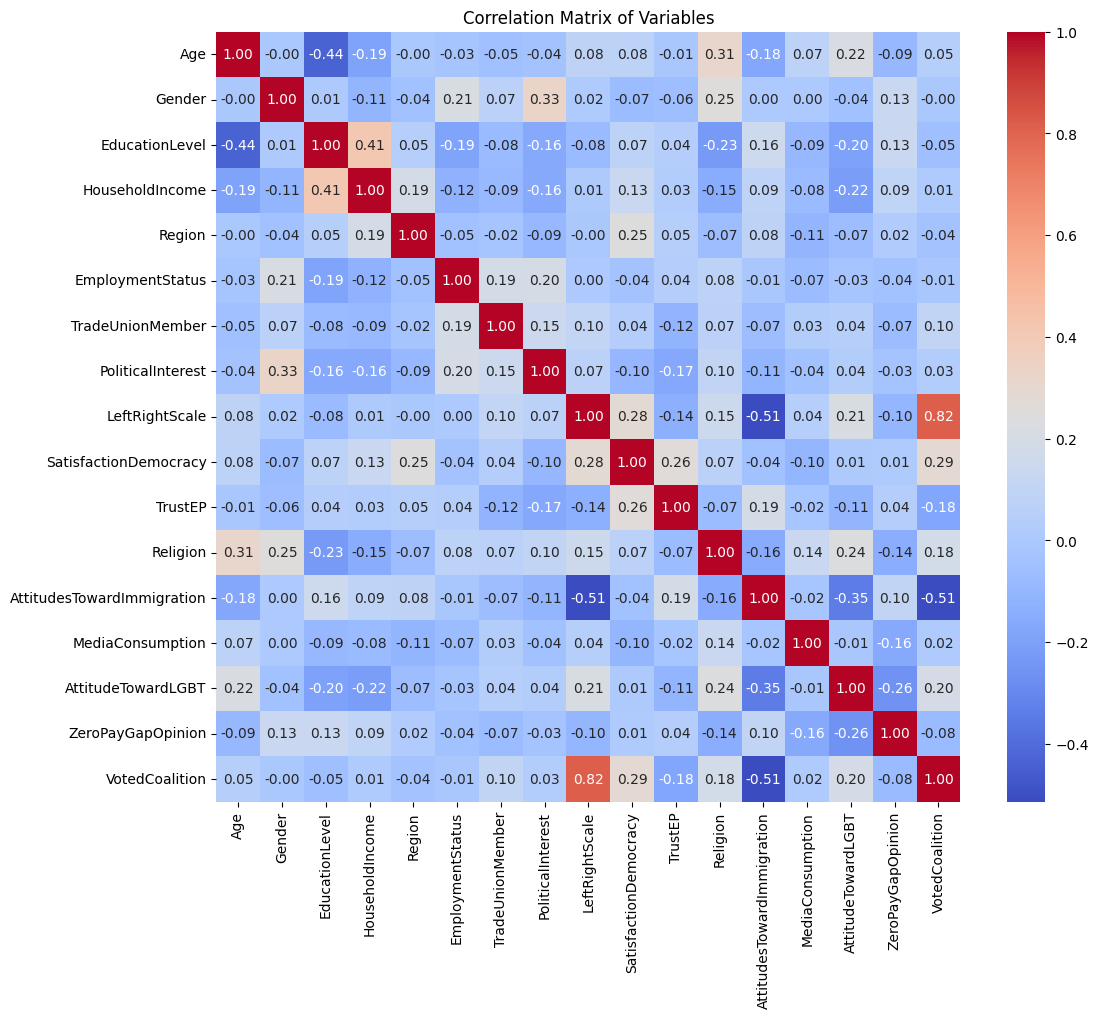

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_final = df_filtered.copy()
df_final = df_final.drop(columns=['VotedParty'])

# Identify categorical columns and apply label encoding
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()
for col in categorical_cols:
    df_final[col] = label_encoder.fit_transform(df_final[col])

# Calculate the correlation matrix and plot it
correlation_matrix = df_final.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


## Bivariate Analysis

In this part we run two bivariate analysis, between our outcome variable (VotedCoalition) and the variables that shows the highest correlation with it (see the matrix above).
The first analysis is with the variable AttitudesTowardImmigration: believing that immigrates makes the place where you live worse is consistently correlated with voting for the Center-Right coalition.

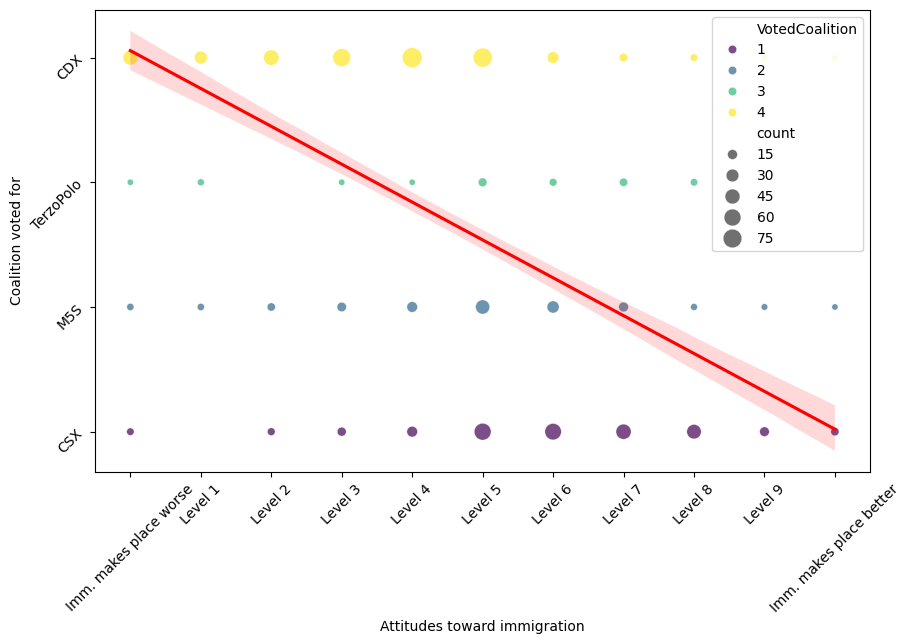

In [ ]:
# Group data to get count of each combination of 'AttitudesTowardImmigration' and 'VotedCoalition'
df_counts = df_final.groupby(['AttitudesTowardImmigration', 'VotedCoalition']).size().reset_index(name='count')

# Create the scatter plot with varying point sizes based on density (count)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='AttitudesTowardImmigration',
    y='VotedCoalition',
    data=df_counts,
    size='count',
    sizes=(20, 200),
    alpha=0.7,
    hue='VotedCoalition',
    palette='viridis'
)

# Add a regression line
sns.regplot(x='AttitudesTowardImmigration', y='VotedCoalition', data=df_final, scatter=False, color='red')

# Set the axis labels and apply label_names for AttitudesTowardImmigration and VotedCoalition
plt.xlabel("Attitudes toward immigration")
plt.ylabel("Coalition voted for")

plt.xticks(ticks=range(11), labels=[label_names['AttitudesTowardImmigration'].get(i, i) for i in range(11)], rotation=45)
plt.yticks(ticks=range(1, 5), labels=[label_names['VotedCoalition'].get(i, i) for i in range(1, 5)], rotation=45)

plt.show()


The second bivariate analysis substitutes AttitudesTowardImmigration with SatisfactionDemocracy: higher levels of satisfaction with democracy are correlated with voting for the Center-Right coalition. However, overall the mass of votes seems to be mainly spread in the centered values for all the coalitions.

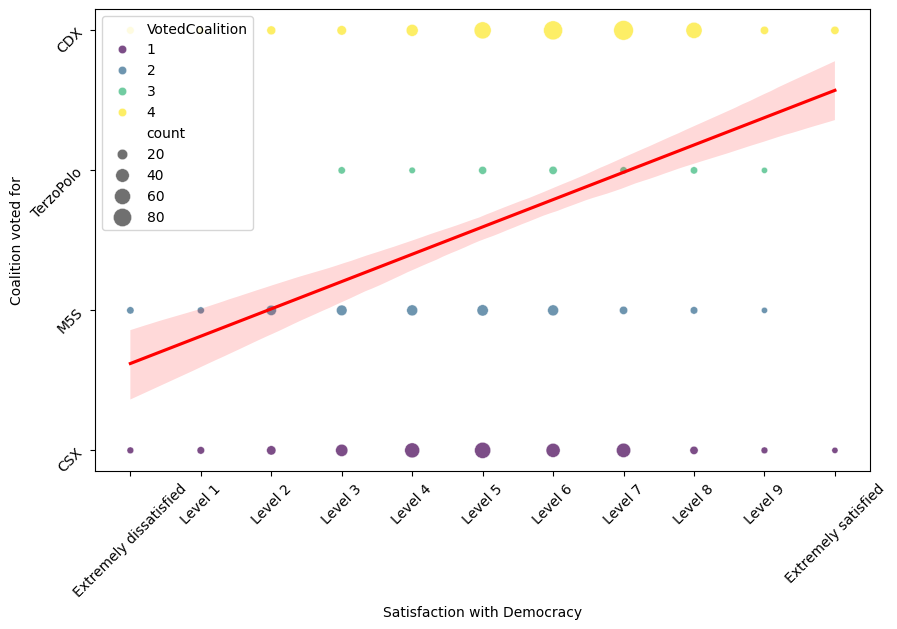

In [ ]:
# You may check the previous chunk for the commented code
df_counts = df_final.groupby(['SatisfactionDemocracy', 'VotedCoalition']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SatisfactionDemocracy',
    y='VotedCoalition',
    data=df_counts,
    size='count',
    sizes=(20, 200),
    alpha=0.7,
    hue='VotedCoalition',
    palette='viridis'
)

sns.regplot(x='SatisfactionDemocracy', y='VotedCoalition', data=df_final, scatter=False, color='red')

plt.xlabel("Satisfaction with Democracy")
plt.ylabel("Coalition voted for")

plt.xticks(ticks=range(11), labels=[label_names['SatisfactionDemocracy'].get(i, i) for i in range(11)], rotation=45)
plt.yticks(ticks=range(1, 5), labels=[label_names['VotedCoalition'].get(i, i) for i in range(1, 5)], rotation=45)

plt.show()


## Univariate Analysis

In the following part we focused on the univariate analysis of the variables involved, with an individuals focus on the outcome variable and then an aggregated analysis of the other variables.

<ipython-input-55-1f4a34a7e596>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='VotedCoalition', data=df_final, palette = "viridis")
<ipython-input-55-1f4a34a7e596>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names['VotedCoalition'].get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()], rotation=45, ha='right')


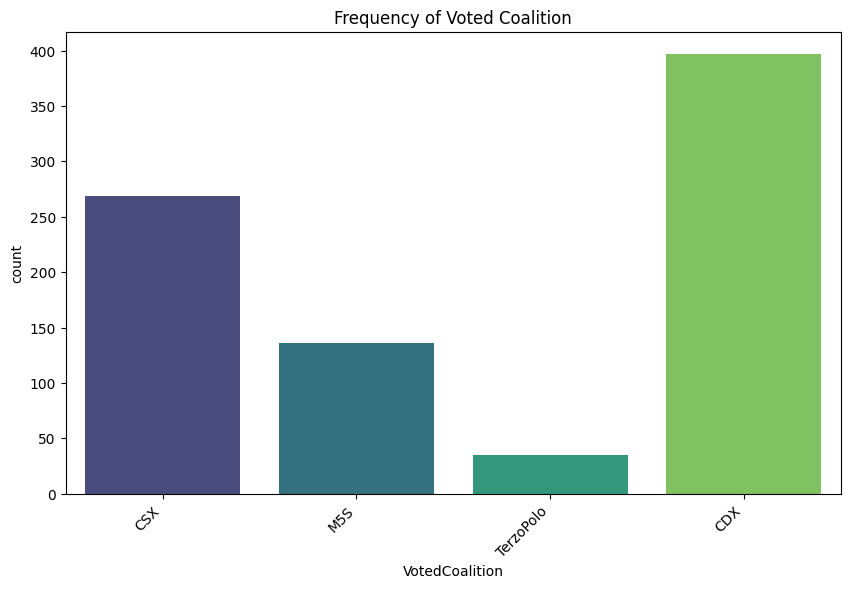

<ipython-input-55-1f4a34a7e596>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='VotedCoalition', y='Age', data=df_final, palette = "viridis")
<ipython-input-55-1f4a34a7e596>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names['VotedCoalition'].get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()], rotation=45, ha='right')


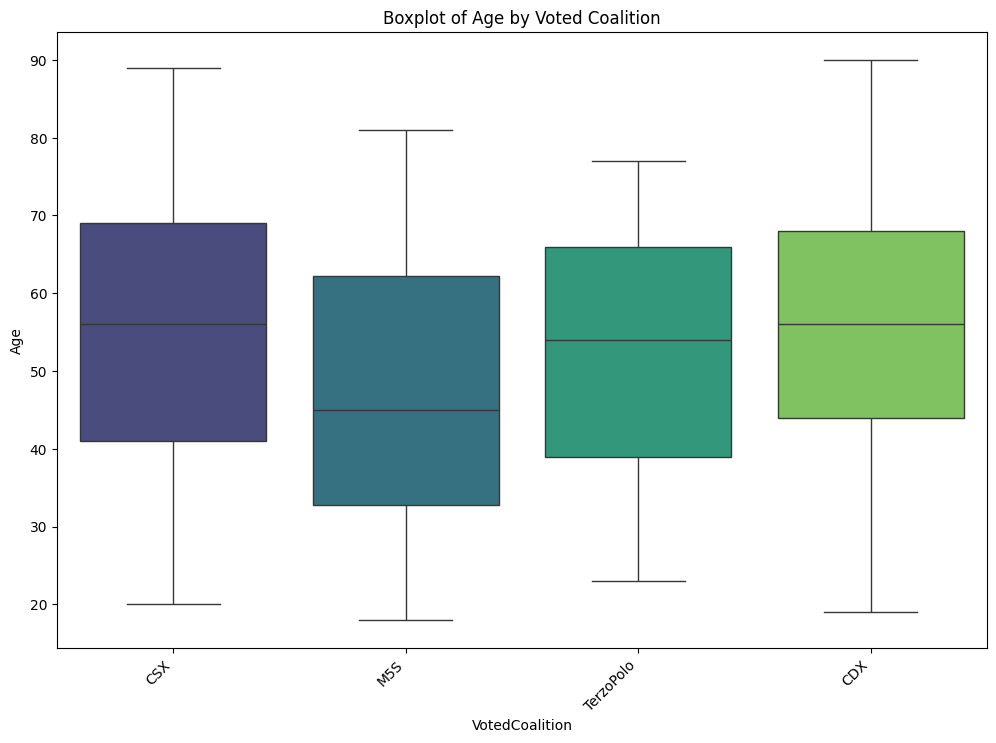

In [ ]:
# Countplot for outcome variable 'VotedCoalition'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='VotedCoalition', data=df_final, palette = "viridis")

# Set custom x-axis labels using the label_names dictionary
ax.set_xticklabels([label_names['VotedCoalition'].get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.title('Frequency of Voted Coalition')
plt.show()

# Boxplot for 'Age' by 'VotedCoalition'
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='VotedCoalition', y='Age', data=df_final, palette = "viridis")

# Set the x-axis labels using our dictionary (label_names)
ax.set_xticklabels([label_names['VotedCoalition'].get(int(label.get_text()), label.get_text()) for label in ax.get_xticklabels()], rotation=45, ha='right')

plt.title('Boxplot of Age by Voted Coalition')
plt.show()

The analysis of all the other relevant variables follows:

<ipython-input-56-afe2dbe942b4>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names[var].get(int(label.get_text()), label.get_text())
<ipython-input-56-afe2dbe942b4>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names[var].get(int(label.get_text()), label.get_text())
<ipython-input-56-afe2dbe942b4>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names[var].get(int(label.get_text()), label.get_text())
<ipython-input-56-afe2dbe942b4>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_names[var].get(int(label.get_text()), label.get_text())
<ipython

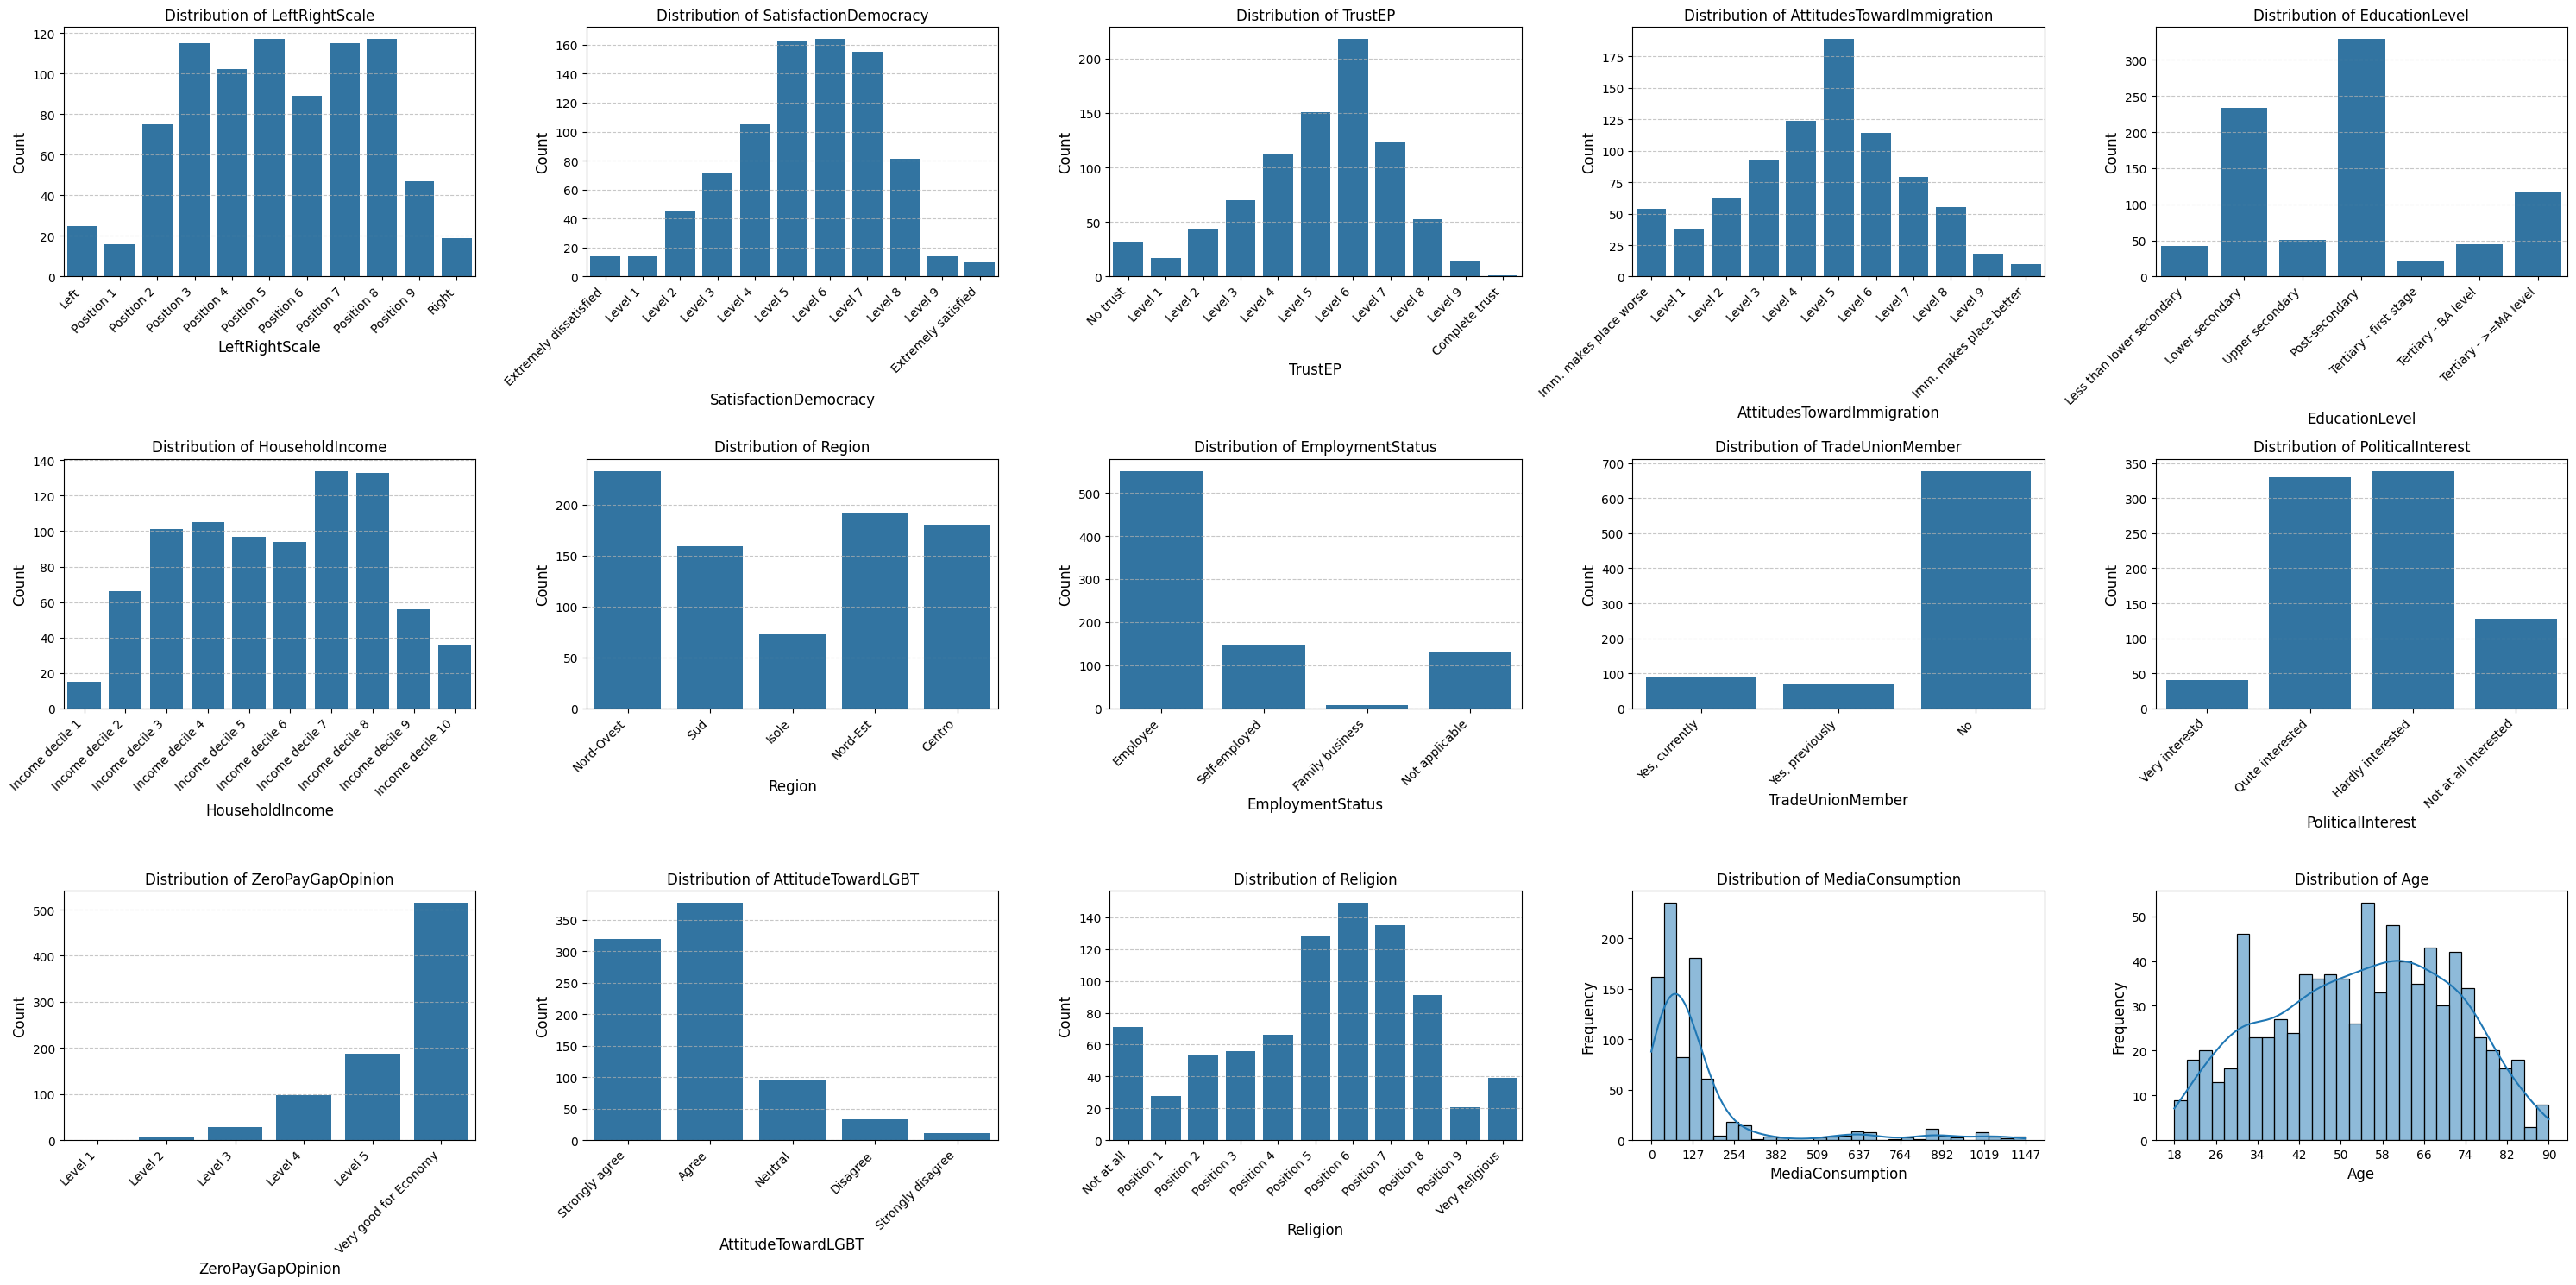

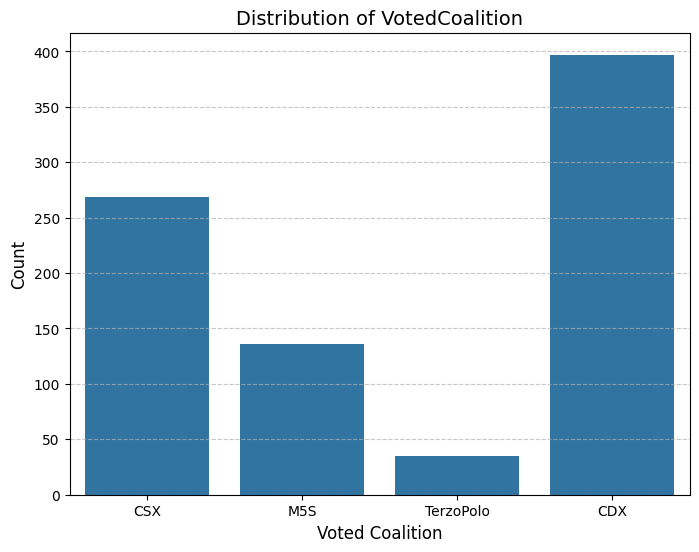

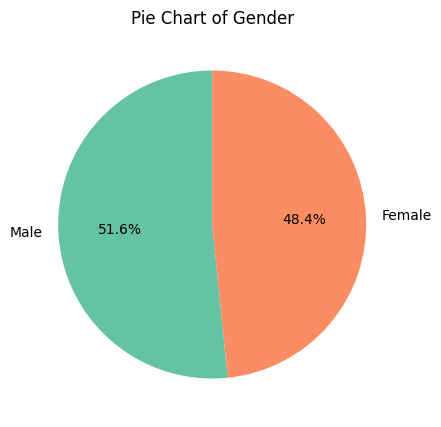

In [ ]:
# Define the variables for bar charts (all except Age and MediaConsumption)
barplot_vars = ['LeftRightScale', 'SatisfactionDemocracy', 'TrustEP',
                'AttitudesTowardImmigration', 'EducationLevel', 'HouseholdIncome',
                'Region', 'EmploymentStatus', 'TradeUnionMember', 'PoliticalInterest',
                'ZeroPayGapOpinion', 'AttitudeTowardLGBT', 'Religion']

# Separate histplot variable (MediaConsumption)
histplot_vars = ['MediaConsumption', 'Age']

# Define pie chart variables (here we only have one, but you may want to include more in your analysis)
pie_vars = ['Gender']

# Define VotedCoalition to be in a separate figure
voted_coalition_var = 'VotedCoalition'

# Determine grid size based on total number of plots (could be personalised)
num_vars = len(barplot_vars) + len(histplot_vars)
cols = 5
rows = -(-num_vars // cols)

# Create subplots for bar charts, histplot
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))
axes = axes.flatten()

# Plot bar charts for categorical variables
for i, var in enumerate(barplot_vars):
    ax = axes[i]
    sns.countplot(x=var, data=df_final, ax=ax, order=sorted(df_final[var].dropna().unique()))

    # Set correct x-axis labels using the label_names dictionary
    ax.set_xticklabels([label_names[var].get(int(label.get_text()), label.get_text())
                        for label in ax.get_xticklabels()], rotation=45, ha='right')

    ax.set_title(f"Distribution of {var}", fontsize=12)
    ax.set_xlabel(f"{var}", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Plot histplot for MediaConsumption
for j, var in enumerate(histplot_vars, start=len(barplot_vars)):
    ax = axes[j]
    sns.histplot(df_final[var], kde=True, ax=ax, bins=30)
    ax.set_title(f"Distribution of {var}", fontsize=12)
    ax.set_xlabel(f"{var}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

    # Reduce number of x-axis ticks for readability
    unique_values = sorted(df_final[var].unique())  # Get unique values
    selected_ticks = np.linspace(min(unique_values), max(unique_values), num=10, dtype=int)  # Select 10 evenly spaced ticks
    ax.set_xticks(selected_ticks)

# Remove any empty subplots (for cases where there are fewer plots than available axes)
for k in range(num_vars, len(axes)):
    fig.delaxes(axes[k])

# Adjust layout and display
plt.tight_layout()

# Create a separate plot for VotedCoalition
plt.figure(figsize=(8, 6))
sns.countplot(x=voted_coalition_var, data=df_final)
plt.title("Distribution of VotedCoalition", fontsize=14)
plt.xlabel("Voted Coalition", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Set correct x-axis labels for VotedCoalition
plt.xticks(ticks=range(4), labels=[label_names[voted_coalition_var].get(i, i) for i in range(1, 5)])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Main figure (bar charts and histplots)
plt.show()

# Create a separate figure for Pie Chart (Gender)
fig_pie, ax_pie = plt.subplots(figsize=(6, 5))

# Plot pie chart for Gender
var = "Gender"
size = df_final[var].value_counts()
ax_pie.pie(size, labels=[label_names[var].get(int(i), i) for i in size.index],
           autopct='%1.1f%%', startangle=90,
           colors=sns.color_palette("Set2", n_colors=len(size)))
ax_pie.set_title(f"Pie Chart of {var}", fontsize=12)

plt.show()

## Machine Learning and Regression Analysis

In this section we perform all the relevant machine learning and regression analyses, explained and developed step by step, starting with more descriptive analysis and discussions on some adjustments and adopted techniques.

We plot the density distribution of vote for each coalition on the Left-Right scale. Since our variable of interest Left-Right Scale is discrete, we initially proceed with a boxen plot.

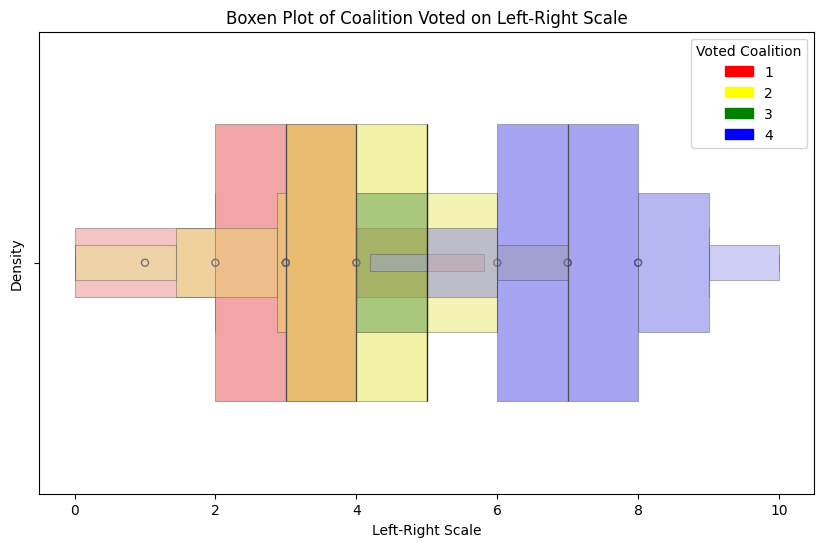

In [ ]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))

# Get unique categories, ensuring consistent order
coalitions = df_final["VotedCoalition"].dropna().unique()
coalitions.sort()  # Sort to maintain consistent color order

# Define our custom color palette for the coalitions (following typical parties colors). You can add more colors if define more granular coalitions
custom_palette = ['red', 'yellow', 'green', 'blue']

# Loop through each category and plot a boxen plot
legend_patches = []
for i, coalition in enumerate(coalitions):
    sns.boxenplot(
        x=df_final.loc[df_final["VotedCoalition"] == coalition, "LeftRightScale"],
        color=custom_palette[i],
        alpha=0.4,
        width=0.6
    )
    legend_patches.append(mpatches.Patch(color=custom_palette[i], label=coalition))

plt.xlabel('Left-Right Scale')
plt.ylabel('Density')
plt.title('Boxen Plot of Coalition Voted on Left-Right Scale')

plt.legend(handles=legend_patches, title="Voted Coalition", loc="upper right")
plt.show()


We move to a classic density distribution plot (KDE), which is visually clearer, always acknowledging the fact that the outcome variable is categorical.

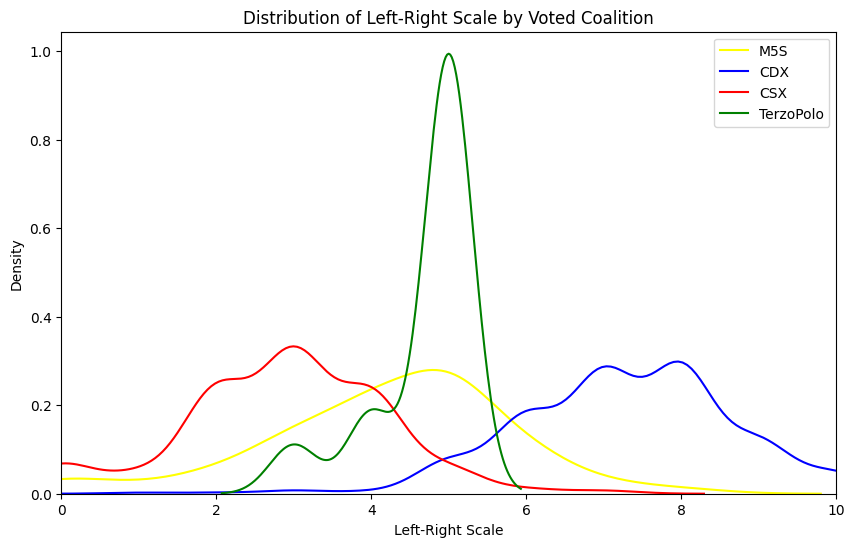

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = {1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}

# Loops for the lines plot
for coalition in df_final['VotedCoalition'].unique():
  df_coalition = df_final[df_final['VotedCoalition'] == coalition]

  sns.kdeplot(
      df_coalition['LeftRightScale'],
      label=label_names['VotedCoalition'].get(coalition, coalition),
      color=custom_palette.get(coalition),
      #bw_adjust=0.8,
      #fill=True,
      #cut=0,
  )

# Set the plot, axis labels and title, legend
plt.xlabel('Left-Right Scale')
plt.ylabel('Density')
plt.title('Distribution of Left-Right Scale by Voted Coalition')
plt.xlim(0, 10)
plt.legend()


plt.show()


And finally with a more adequate bar chart.

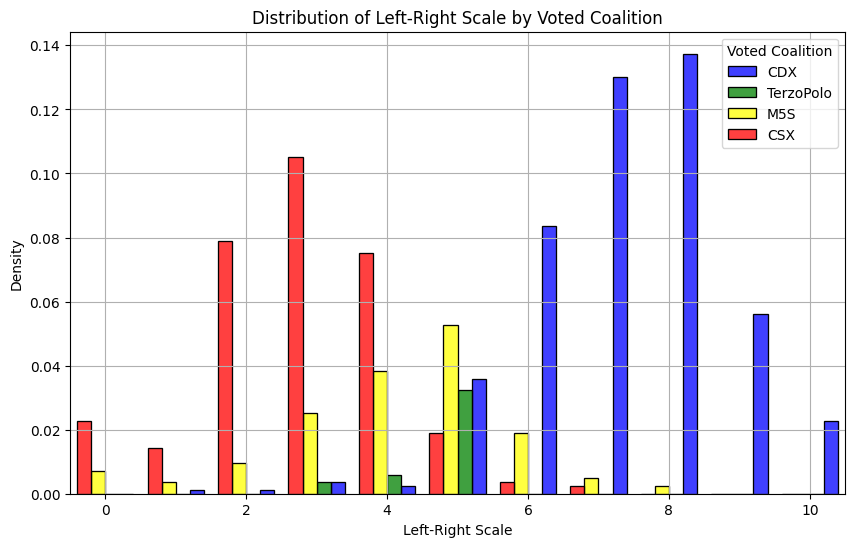

In [ ]:
plt.figure(figsize=(10, 6))
custom_palette = {1: 'red', 2: 'yellow', 3: 'green', 4: 'blue'}

sns.histplot(
    data=df_final,
    x="LeftRightScale",
    hue="VotedCoalition",
    multiple="dodge",
    discrete=True,
    shrink=0.8,
    palette=custom_palette,
    stat='density'
)

plt.xlabel('Left-Right Scale')
plt.ylabel('Density')
plt.title('Distribution of Left-Right Scale by Voted Coalition')
plt.xlim(-0.5, 10.5)
plt.legend(title='Voted Coalition', labels=[
    label_names['VotedCoalition'].get(k, k) for k in sorted(df_final['VotedCoalition'].unique())[::-1]
])
plt.grid(True)
plt.show()

# Decision Tree Classifier

The first analysis that we have implemented is the Decision Tree Classifier, which allows to have an immediate visualisation of the most relevant variables in defining the voting patterns of the individuals. \\

The very first analysis is carried out on the raw data: we divide the sample in training and test datasets and train the decision tree classifier.

In [ ]:
# Import necessary packages for analyses
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
import xgboost as xgb
import statsmodels.api as sm

In [ ]:
X = df_final.drop('VotedCoalition', axis=1)
y = df_final['VotedCoalition']

# Split data into training and testing sets, with a composition of 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Initialization of the Classifier: Decision Tree
clf = DecisionTreeClassifier()

# Train the DTC
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


# Verification: make predictions on the training set
y_train_pred = clf.predict(X_train)

# Evaluate the model's accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")



Test Accuracy: 0.7380952380952381
Training Accuracy: 1.0


It is normal for a model to perform better on the training set than on the test set because the model has seen the training data during training and has learned to make predictions on it. However, a large difference in performance between the training set and the test set can indicate overfitting.

In our case, the difference in accuracy between the training set and the test set is very large, so it is highly likely that the model is severely overfitting. It is a good idea to check for signs of overfitting, not just a large gap between the training and validation accuracies but also a decrease in performance on the test set as the model complexity increases.

See what was done below to fix a bit this:

- model may be too deep: set a maximum depth (later on, we let Cross-Validation Methods select for us)
- stratification (see below)

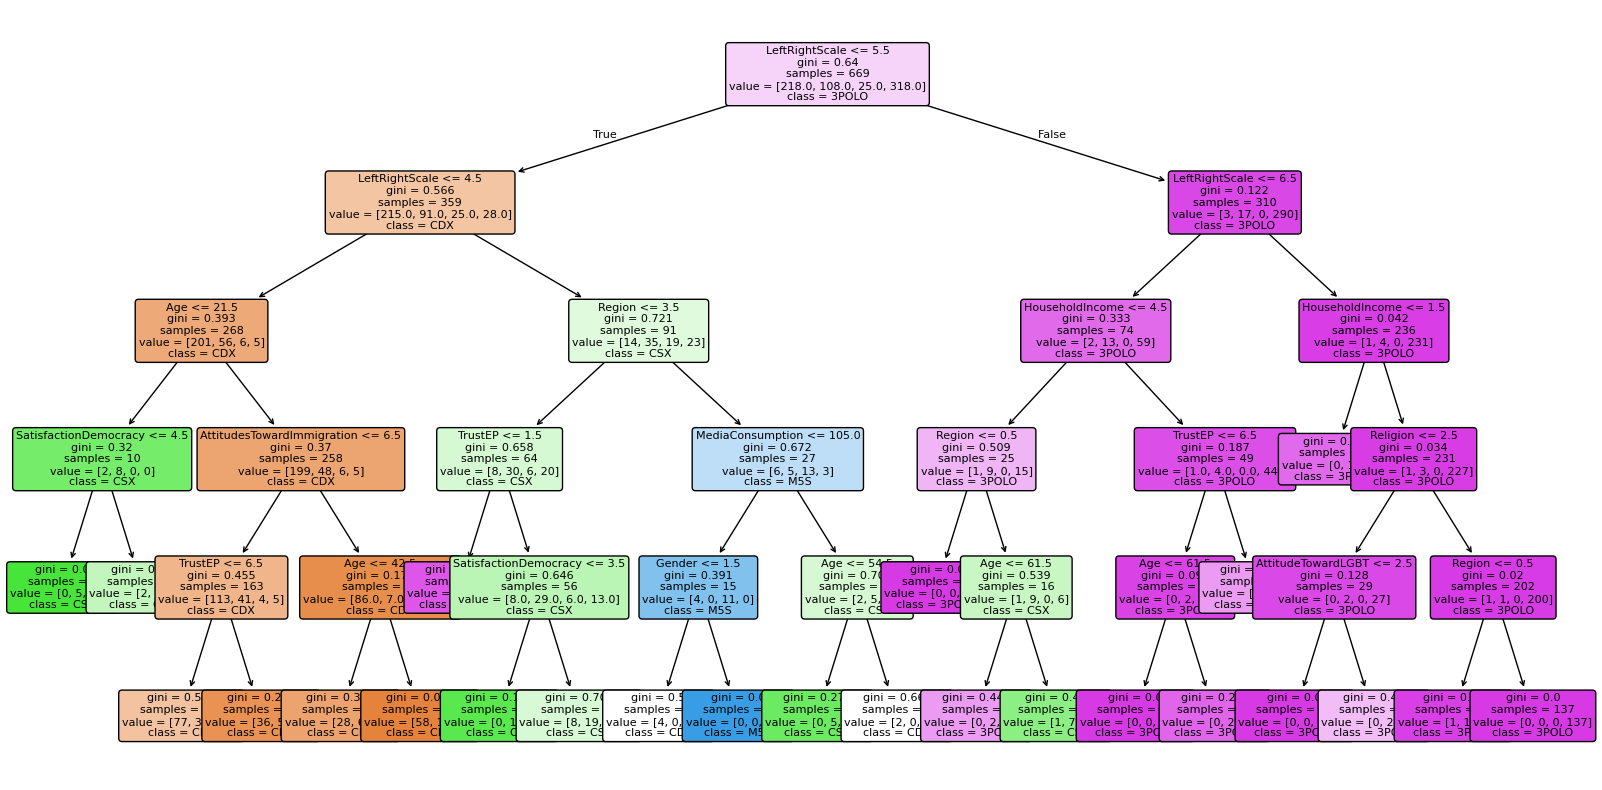

Confusion Matrix:
 [[38  8  2  3]
 [ 7 11  4  6]
 [ 2  4  3  1]
 [ 3  3  1 72]]
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.75      0.75        51
           2       0.42      0.39      0.41        28
           3       0.30      0.30      0.30        10
           4       0.88      0.91      0.89        79

    accuracy                           0.74       168
   macro avg       0.59      0.59      0.59       168
weighted avg       0.73      0.74      0.73       168



In [ ]:
# Max_depth=5
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=60)

clf.fit(X_train, y_train)

# Map target class values to more readable names
target_names = {4: 'CDX', 1: 'CSX', 2: 'M5S', 3: '3POLO'}
y_train_mapped = y_train.map(target_names)
y_test_mapped = y_test.map(target_names)


# Plot
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X_train.columns,  # Use column names for feature names
          class_names=list(target_names.values()), # Use target names for class names
          filled=True,  # Fill nodes with colors
          rounded=True, # Rounded boxes
          fontsize=8,  # Adjust fontsize
          max_depth=5) # Set the max depth

plt.show()

# Minimal Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Now we try to improve the Classifier, for example by **stratifying the samples**. It guarantees that the relative frequencies of each class in the original dataset are reflected in the splits. For example, if one coalition received more votes than others, both the training and test sets will have a similar imbalance. Without stratification, there's a risk that the train or test split might end up with an uneven class distribution, which could lead to biased training or misleading evaluation results.

This makes sure that the two samples training and test are representative of the original dataset, based on characteristics.

Test Accuracy: 0.7738
Training Accuracy: 0.8236
Confusion Matrix:
 [[48  5  0  1]
 [ 9 11  1  6]
 [ 2  4  1  0]
 [ 3  6  1 70]]
Classification Report:
               precision    recall  f1-score   support

         CSX       0.77      0.89      0.83        54
         M5S       0.42      0.41      0.42        27
       3POLO       0.33      0.14      0.20         7
         CDX       0.91      0.88      0.89        80

    accuracy                           0.77       168
   macro avg       0.61      0.58      0.58       168
weighted avg       0.76      0.77      0.77       168



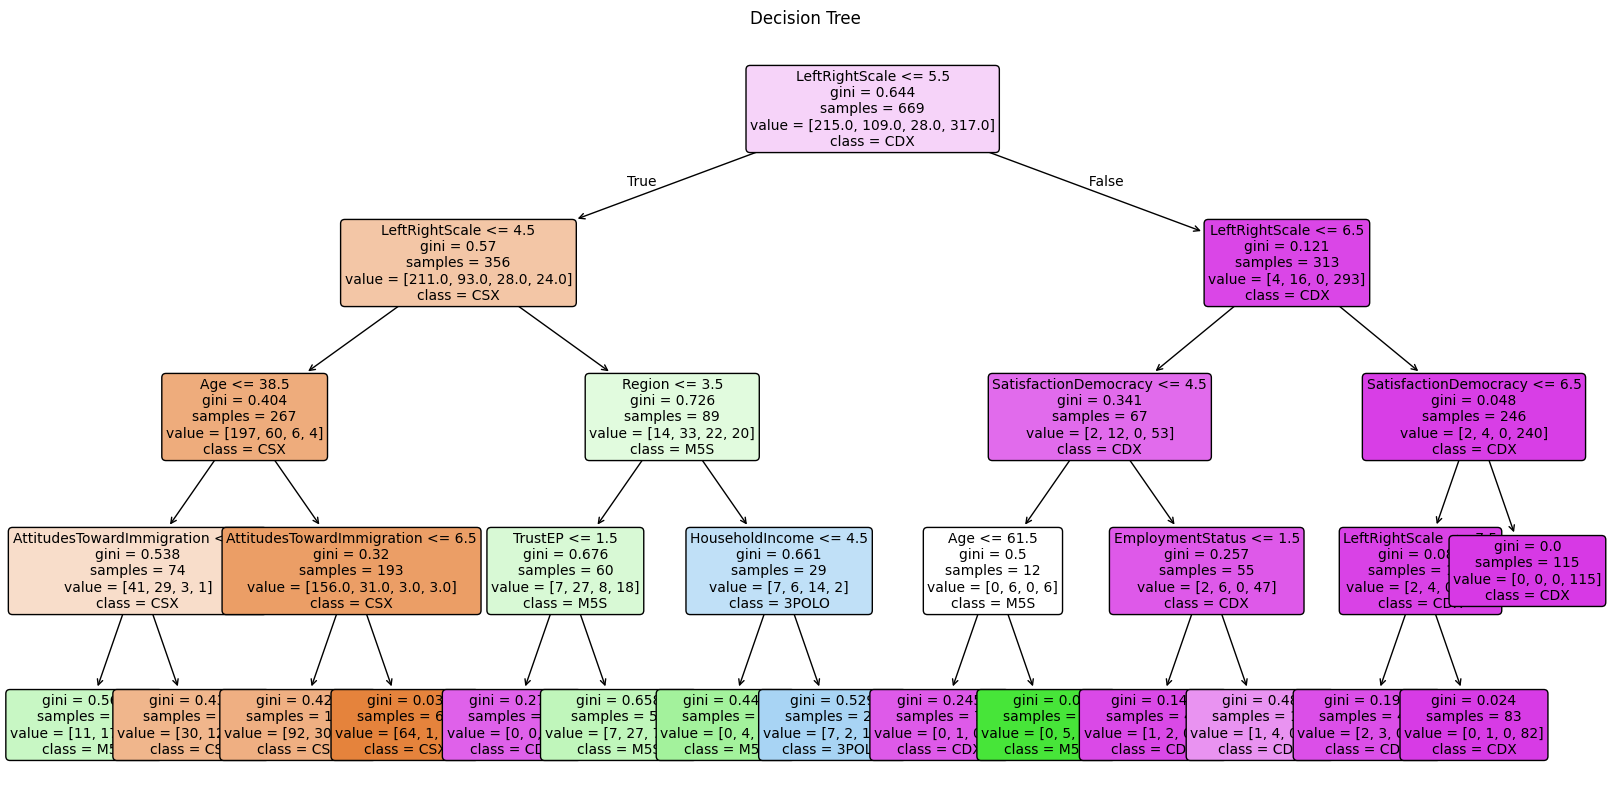

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

# Map target values to names for better readability
y_train_mapped = y_train.map(target_names)
y_test_mapped = y_test.map(target_names)

clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=60)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluate training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


# Print Confusion Matrix and Classification Report (using original labels)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=[target_names[c] for c in sorted(target_names.keys())]))


# Decision Tree plot
plt.figure(figsize=(20, 10))
class_names = [target_names[c] for c in clf.classes_]
plot_tree(clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


The discrepancy in accuracy between training and test is now lower, because the training is now more generalised and the potential overfitting is reduced.

A second problem that we have to address is the fact that LeftRightScale is clearly a dominant predictor, highly correlated with the outcome variable, and biasing our models. From now on, we will remove LeftRightScale from the models.

Test Accuracy: 0.6071
Training Accuracy: 0.6592
Confusion Matrix:
 [[34  9  0 11]
 [11  8  0  8]
 [ 6  1  0  0]
 [ 9 11  0 60]]
Classification Report:
               precision    recall  f1-score   support

         CSX       0.57      0.63      0.60        54
         M5S       0.28      0.30      0.29        27
       3POLO       0.00      0.00      0.00         7
         CDX       0.76      0.75      0.75        80

    accuracy                           0.61       168
   macro avg       0.40      0.42      0.41       168
weighted avg       0.59      0.61      0.60       168



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


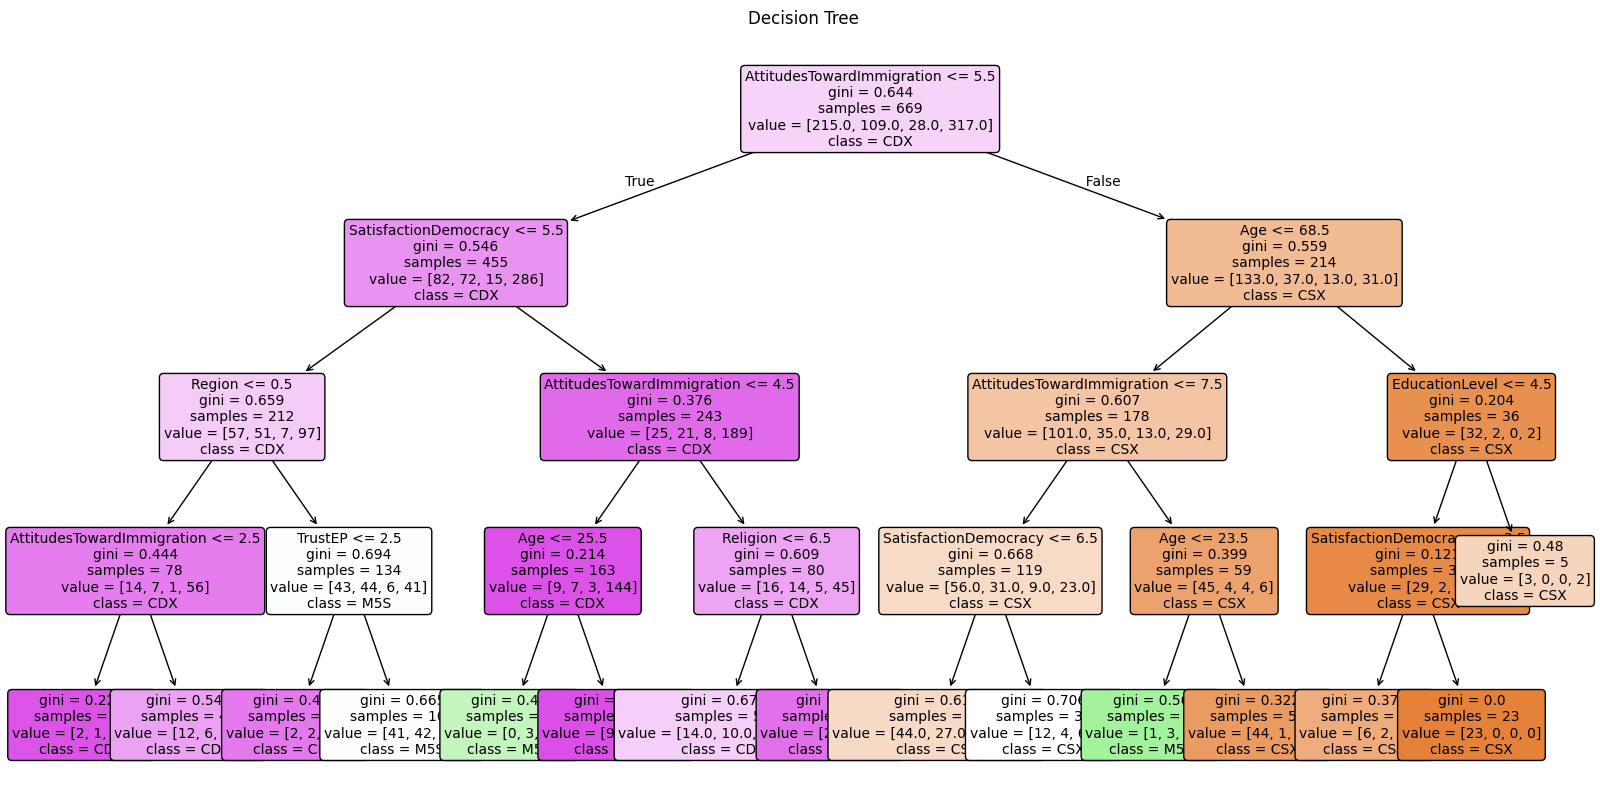

In [ ]:
# Create a new dataset without LeftRightScale
df_final2 = df_final.drop('LeftRightScale', axis=1)
target_names = {4: 'CDX', 1: 'CSX', 2: 'M5S', 3: '3POLO'}

X = df_final2.drop('VotedCoalition', axis=1)
y = df_final2['VotedCoalition']

# Split data (usual 80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)

# Map target values to names for readability
y_train_mapped = y_train.map(target_names)
y_test_mapped = y_test.map(target_names)

# Initialize Decision Tree Classifier with hyperparameters
clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             #class_weight="balanced",
                             random_state=60)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")


# Print Confusion Matrix and Classification Report (using original labels)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=[target_names[c] for c in sorted(target_names.keys())]))

# Decision Tree Plot
plt.figure(figsize=(20, 10))
class_names = [target_names[c] for c in clf.classes_]
plot_tree(clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


After having addressed the stratification issue (to ensure representativeness in both training and test sets) and having removed LeftRightScale from the model, we focus on two additional issues:
1. Imbalanced classes: Given the distribution of votes (outcome variable, Party Voted) observed in the descriptive statistics above, the amount of votes for CSX and CDX coalitions is disproportionately higher, while we observe few votes for 3POLO and M5S. Consequently, we address this imbalance with 3 methods:
  * SMOTE (Synthetic Minority Over-sampling Technique).
  * Bootstrapping.
  * Weighted random forests. \\
  Note that we apply these methodologies only to the training set, and not to the test one, otherwise our test would be carried out on a synthetic (not-real) set, and the metrics (F1, accuracy) would be inflated.
2. Several Hyperparameters to be selected: given that in our models several hyperparameters have to be selected, we take advantage of Cross-Validation methods. After performing several combinations, they select the best one. After trying both Grid Search and Random Search and getting similar results, we opted for the former one, more exhaustive. However, in your implementation you can easily switch to RandomSearch.



To understand better the first problem, we realize a Base Decision Tree, without any of the oversampling/balancing methods. Also, we still do not use Cross-Validation.

Decision Tree Accuracy: 0.6369047619047619


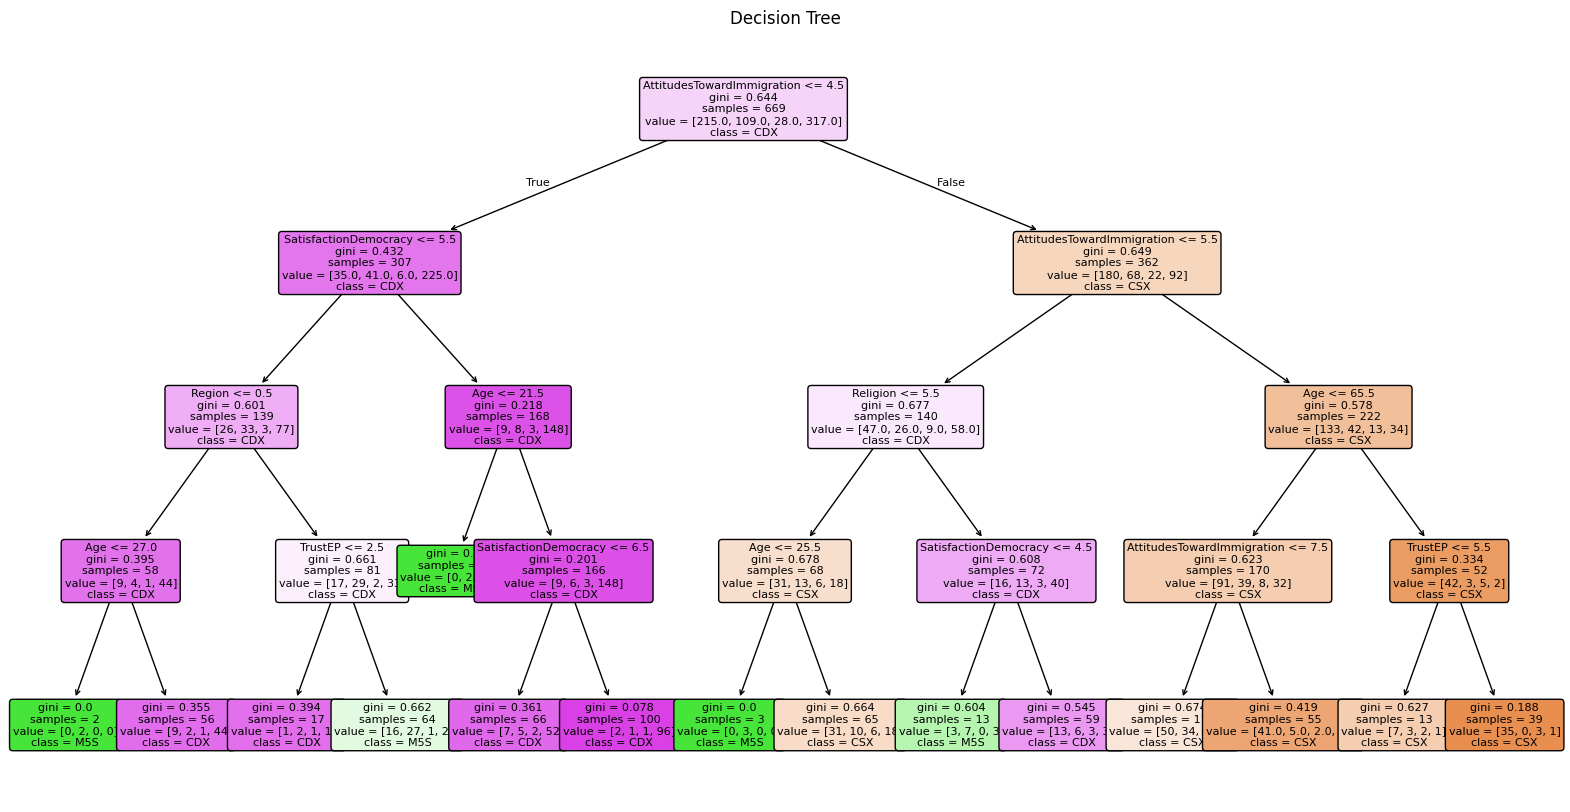

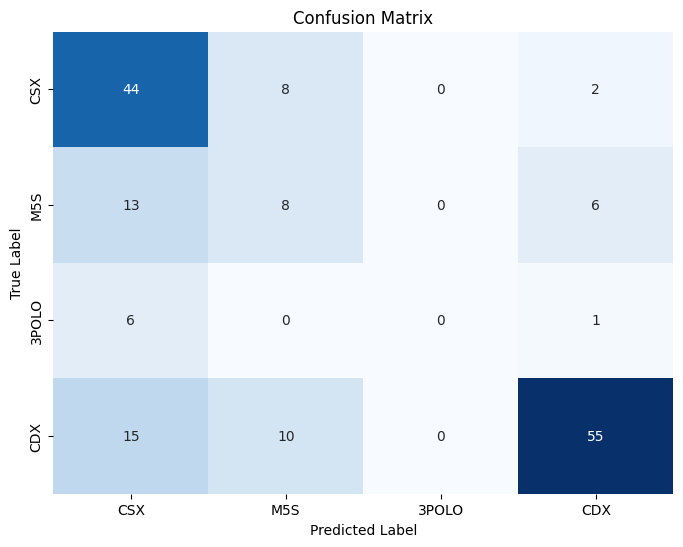

In [ ]:
X = df_final2.drop('VotedCoalition', axis=1)
y = df_final2['VotedCoalition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42, max_depth = 4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Plot the decision tree
plt.figure(figsize=(20, 10))

class_names = [target_names[c] for c in clf.classes_]
plot_tree(clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree")
plt.show()


#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


We observe that the accuracy is pretty good, but the model performs very poorly for the two minority classes. Indeed, the accuracy is driven by the two biggest classes: the model simply predicts those two classes for most observations, also for those belonging to the coalitions in the middle (minority classes).

Now we apply Cross-validation and Oversampling methods.

1) Decision Tree with Cross-validation + SMOTE

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5}
Decision Tree Accuracy (with GridSearchCV and SMOTE on training set only): 0.4642857142857143


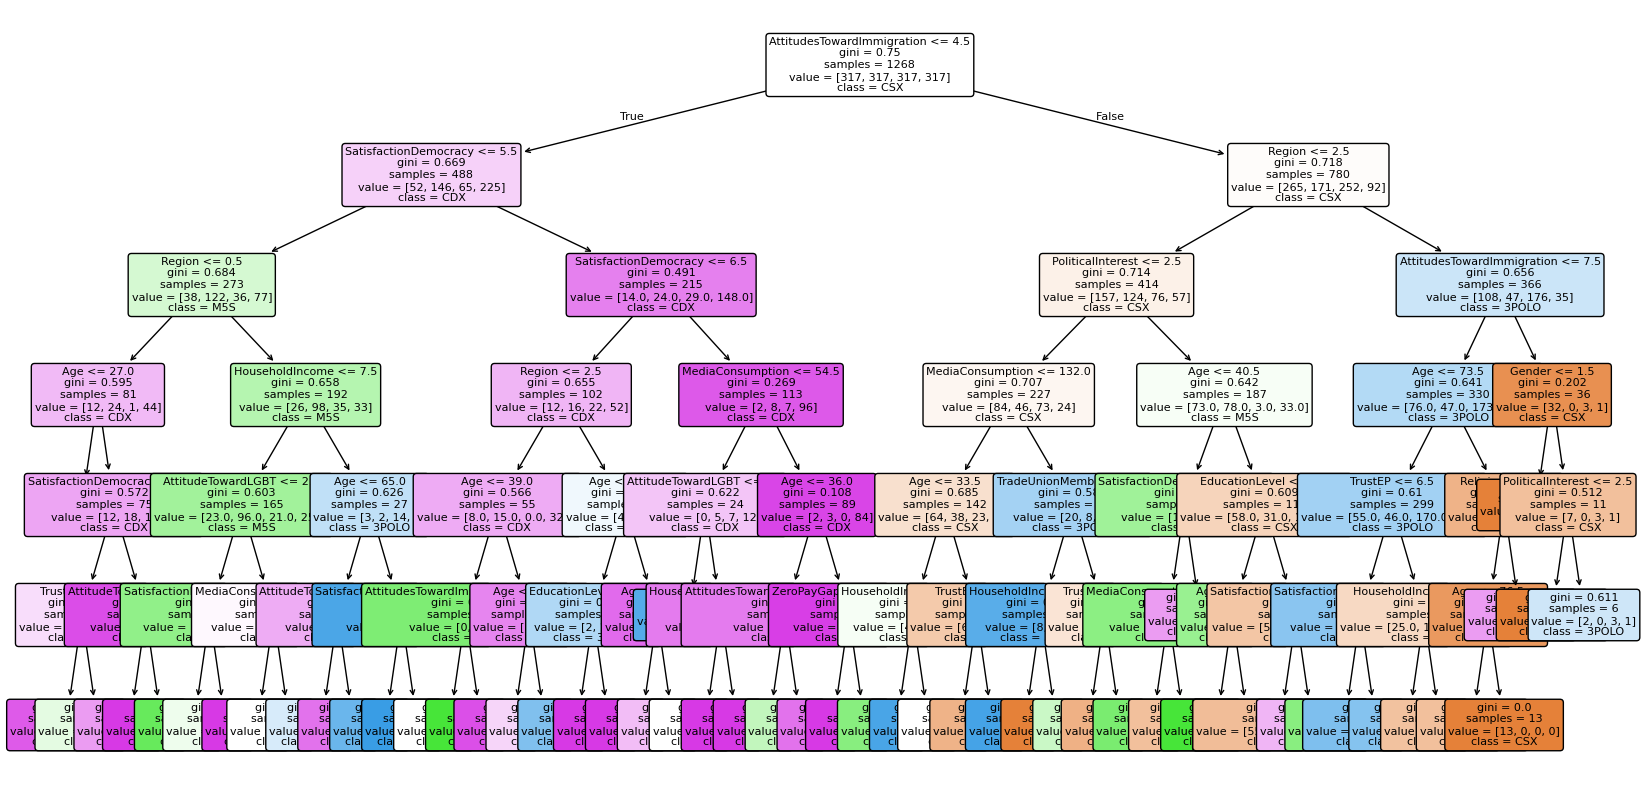

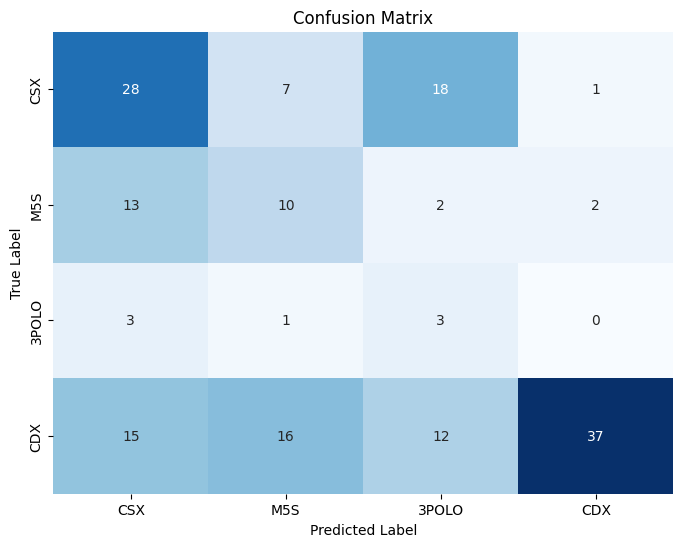

              precision    recall  f1-score   support

           1       0.47      0.52      0.50        54
           2       0.29      0.37      0.33        27
           3       0.09      0.43      0.14         7
           4       0.93      0.46      0.62        80

    accuracy                           0.46       168
   macro avg       0.44      0.44      0.40       168
weighted avg       0.64      0.46      0.51       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree classifier with GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with GridSearchCV and SMOTE on training set only): {accuracy}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=8)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


Here, same approach but using Random Search for cross-validation, to compare performance.

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 6, 'criterion': 'gini'}
Decision Tree Accuracy (with GridSearchCV and SMOTE on training set only): 0.4642857142857143


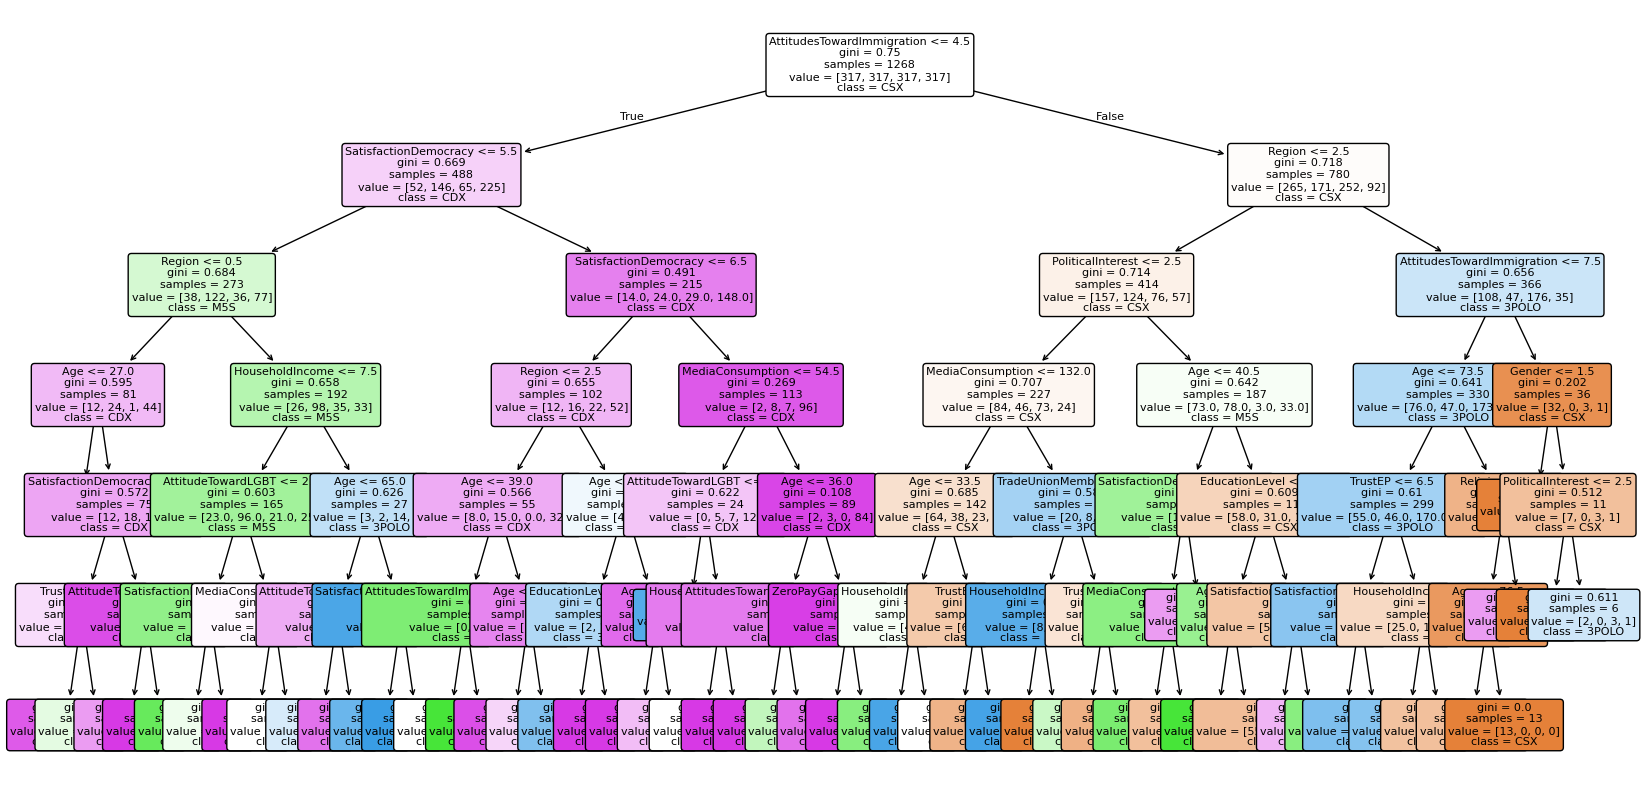

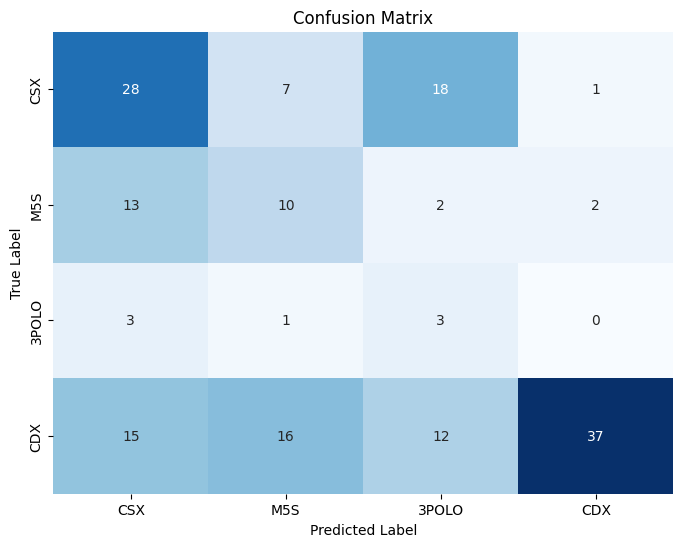

              precision    recall  f1-score   support

           1       0.47      0.52      0.50        54
           2       0.29      0.37      0.33        27
           3       0.09      0.43      0.14         7
           4       0.93      0.46      0.62        80

    accuracy                           0.46       168
   macro avg       0.44      0.44      0.40       168
weighted avg       0.64      0.46      0.51       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

clf = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=60, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_clf = random_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with GridSearchCV and SMOTE on training set only): {accuracy}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=8)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_test, y_pred))



2) Decision Tree with Cross-validation + Bootstrapping

Best Hyperparameters: {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5}
Decision Tree Accuracy (with GridSearchCV and Bootstrapping on training set only): 0.47619047619047616


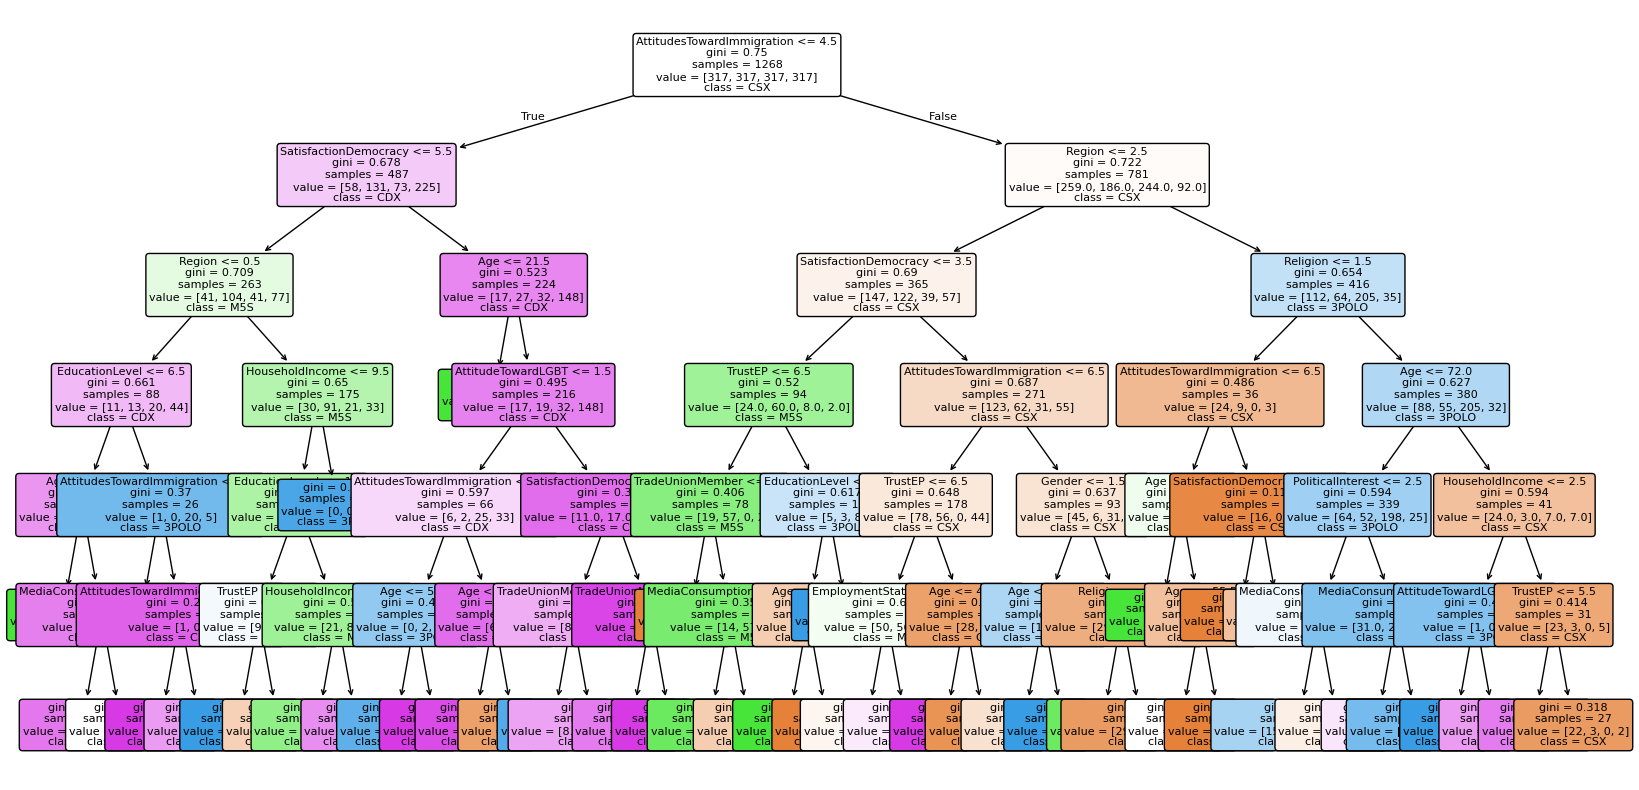

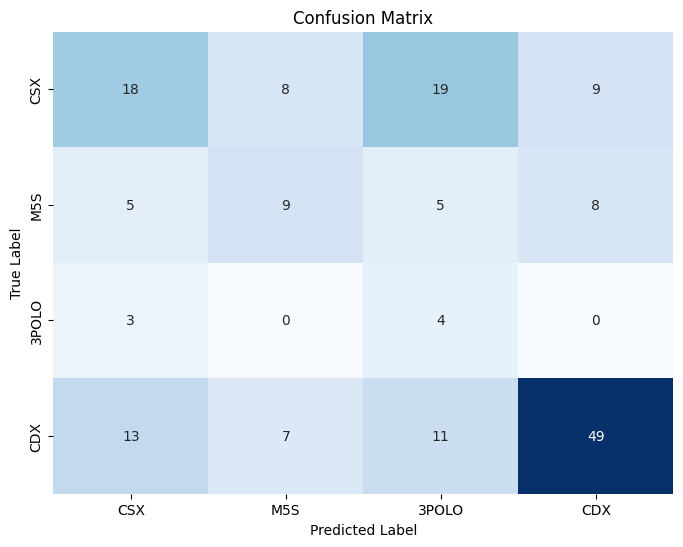

              precision    recall  f1-score   support

           1       0.46      0.33      0.39        54
           2       0.38      0.33      0.35        27
           3       0.10      0.57      0.17         7
           4       0.74      0.61      0.67        80

    accuracy                           0.48       168
   macro avg       0.42      0.46      0.40       168
weighted avg       0.57      0.48      0.51       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply bootstrapping using RandomOverSampler only to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [3, 5, 7, 9]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy (with GridSearchCV and Bootstrapping on training set only): {accuracy}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=class_names,
          filled=True, rounded=True, fontsize=8)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


#Random Forests

Now we move on with a Random Forest model.

A Random Forest is an ensemble learning technique that combines multiple decision trees to improve accuracy and robustness. It creates a "forest" of decision trees and aggregates their predictions (majority vote for classification).

How It Works:
1. The algorithm builds multiple decision trees using bootstrap sampling (randomly selecting data with replacement).
2. Each tree is trained on a different subset of the training data.
3. At each split, only a random subset of features is considered (reduces correlation between trees).
4. Predictions from all trees are aggregated to make a final decision.

With respect to the simple Decision Tree:
1. Reduces overfitting by averaging multiple trees.
2. More accurate and stable than a single decision tree.
3. Can handle high-dimensional datasets well.

It has a few of possible problems:
1. Computationally expensive compared to a single tree.
2. Less interpretable than a single decision tree.


In our case, we keep using Cross-Validation to select the best hyperparameters.

For random forest, we cannot plot the tree since we would have several. We can plot:
1. Feature importance.
2. Confusion matrix.

Simple random forest with cross-validation

Random Forest Accuracy (with GridSearchCV): 0.6785714285714286

Feature Importance:
                       Feature  Importance
11  AttitudesTowardImmigration    0.209238
8        SatisfactionDemocracy    0.119579
0                          Age    0.106330
10                    Religion    0.077200
9                      TrustEP    0.076933
12            MediaConsumption    0.064804
3              HouseholdIncome    0.061983
4                       Region    0.053196
13          AttitudeTowardLGBT    0.052465
2               EducationLevel    0.041983
14           ZeroPayGapOpinion    0.034374
7            PoliticalInterest    0.034270
5             EmploymentStatus    0.030233
6             TradeUnionMember    0.021101
1                       Gender    0.016310


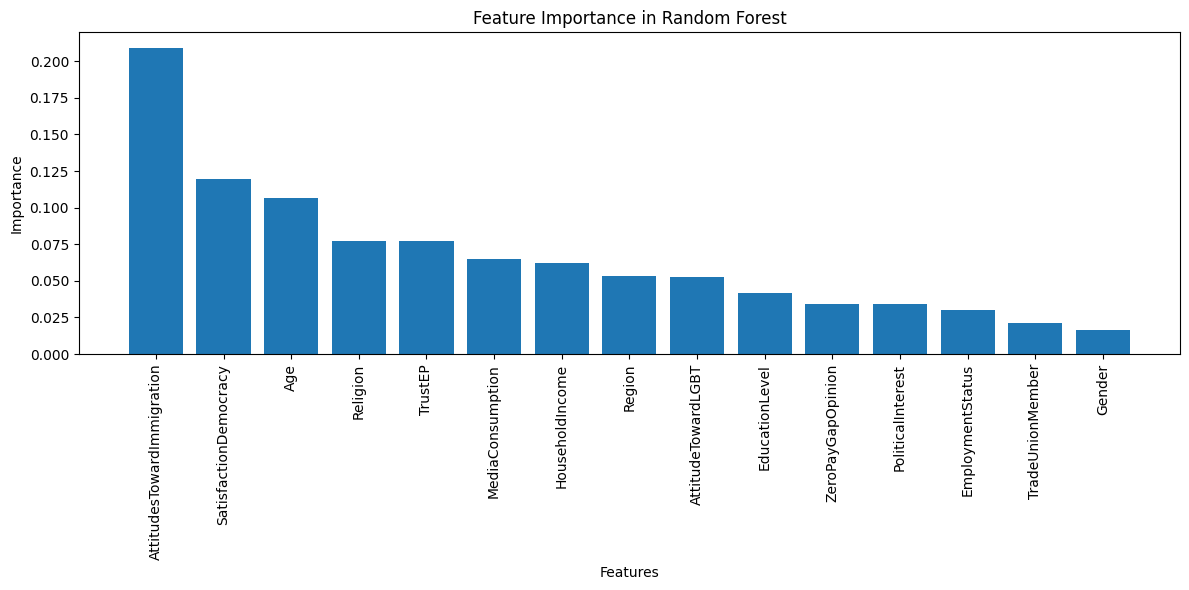

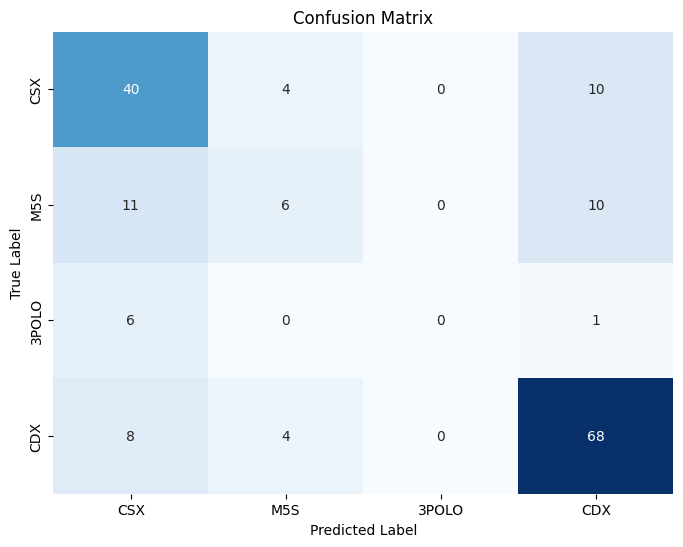

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (with GridSearchCV): {accuracy}")

# Feature Importance
feature_importances = best_rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)


# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = [target_names[c] for c in best_rf_clf.classes_]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


1) Random forest + SMOTE

Random Forest Accuracy (with GridSearchCV and SMOTE): 0.6428571428571429

Feature Importance:
                       Feature  Importance
0                          Age    0.125061
11  AttitudesTowardImmigration    0.115134
8        SatisfactionDemocracy    0.099399
12            MediaConsumption    0.094277
10                    Religion    0.077348
4                       Region    0.075296
3              HouseholdIncome    0.073177
9                      TrustEP    0.072534
2               EducationLevel    0.054090
13          AttitudeTowardLGBT    0.049372
7            PoliticalInterest    0.039398
14           ZeroPayGapOpinion    0.036130
5             EmploymentStatus    0.034706
6             TradeUnionMember    0.028913
1                       Gender    0.025165


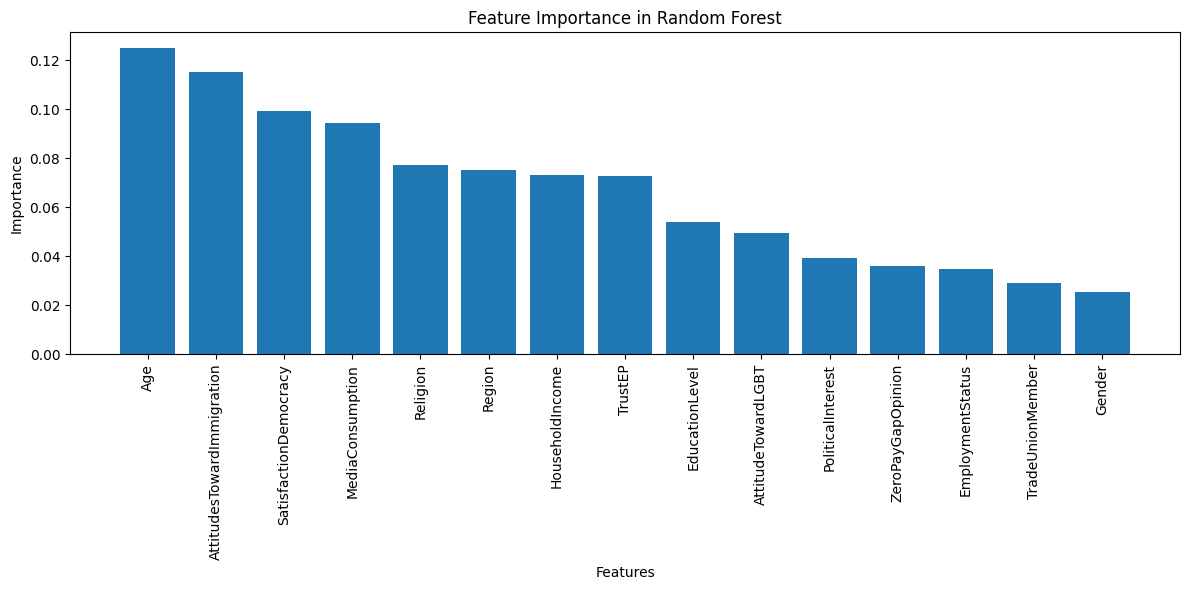

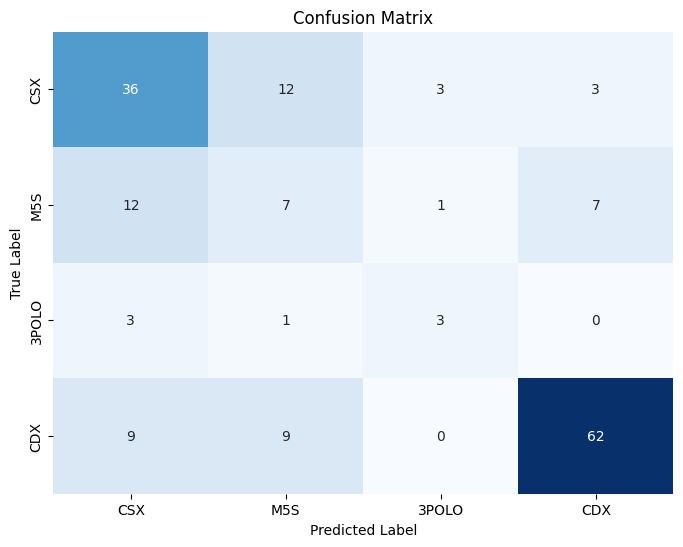

              precision    recall  f1-score   support

           1       0.60      0.67      0.63        54
           2       0.24      0.26      0.25        27
           3       0.43      0.43      0.43         7
           4       0.86      0.78      0.82        80

    accuracy                           0.64       168
   macro avg       0.53      0.53      0.53       168
weighted avg       0.66      0.64      0.65       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (with GridSearchCV and SMOTE): {accuracy}")

# Feature Importance
feature_importances = best_rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = [target_names[c] for c in best_rf_clf.classes_]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


Here we perform the same model but doing cross-validation through Random Search.

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
95 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Random Forest Accuracy (with RandomizedSearchCV and SMOTE): 0.6429


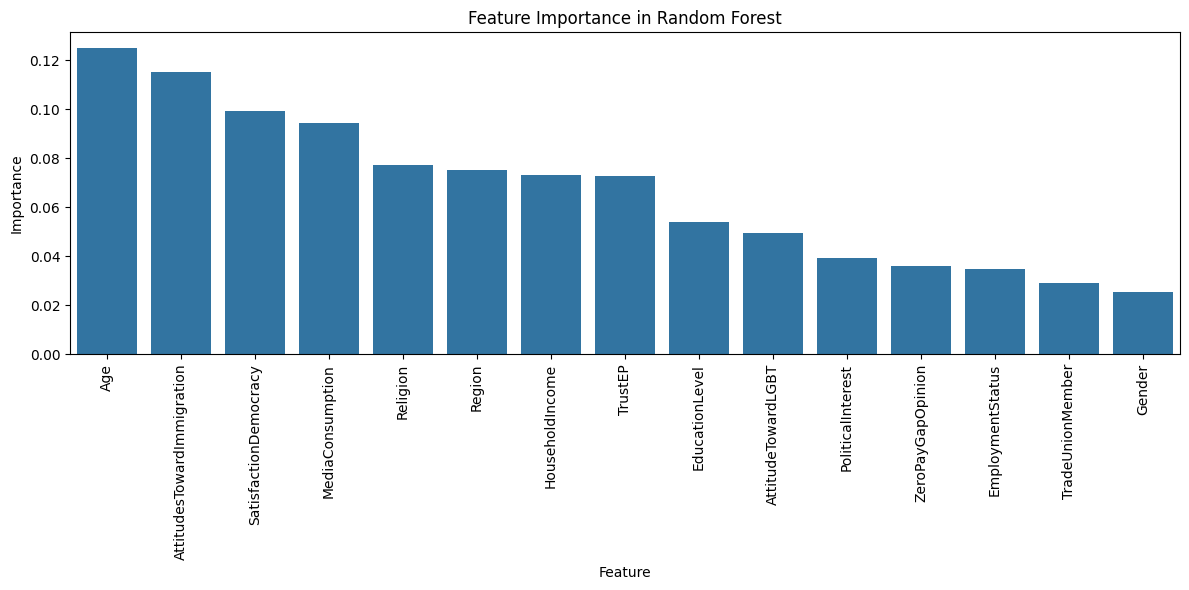

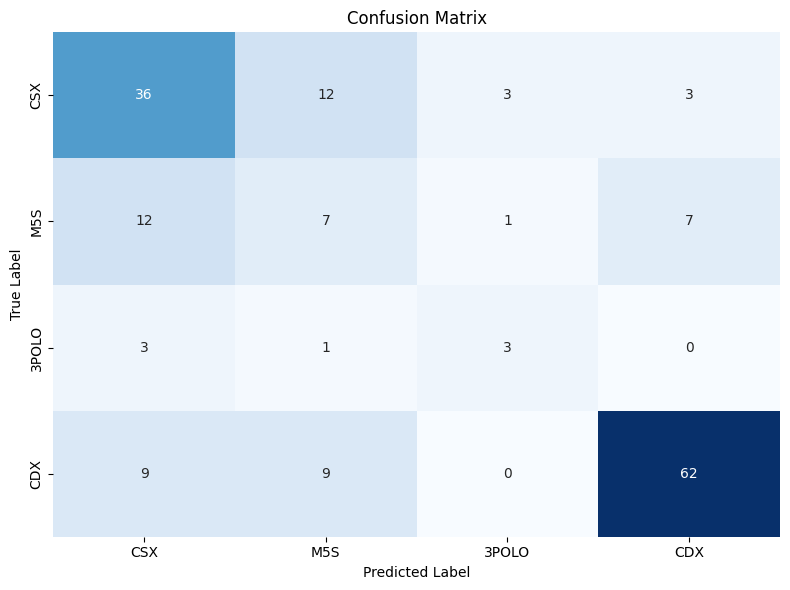


Classification Report:
              precision    recall  f1-score   support

         CSX       0.60      0.67      0.63        54
         M5S       0.24      0.26      0.25        27
       3POLO       0.43      0.43      0.43         7
         CDX       0.86      0.78      0.82        80

    accuracy                           0.64       168
   macro avg       0.53      0.53      0.53       168
weighted avg       0.66      0.64      0.65       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Randomized Search parameters
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


rf_clf = RandomForestClassifier(random_state=42)

# StratifiedKFold for balanced cross-validation + RandomisedSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    rf_clf, param_distributions=param_dist, n_iter=50, cv=cv,
    scoring='accuracy', random_state=60, n_jobs=-1, verbose=1
)

random_search.fit(X_train_resampled, y_train_resampled)
best_rf_clf = random_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (with RandomizedSearchCV and SMOTE): {accuracy:.4f}")

# Feature importance
feature_importances = best_rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Feature', y='Importance')
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


2) Random forest + Bootstrapping

Random Forest Accuracy (with GridSearchCV and Bootstrapping on training set only): 0.6964285714285714

Feature Importance:
                       Feature  Importance
0                          Age    0.123662
11  AttitudesTowardImmigration    0.120043
8        SatisfactionDemocracy    0.101255
12            MediaConsumption    0.084786
3              HouseholdIncome    0.079575
10                    Religion    0.078849
4                       Region    0.078346
9                      TrustEP    0.074376
2               EducationLevel    0.053719
7            PoliticalInterest    0.045441
13          AttitudeTowardLGBT    0.044361
14           ZeroPayGapOpinion    0.035705
5             EmploymentStatus    0.032982
1                       Gender    0.024387
6             TradeUnionMember    0.022514


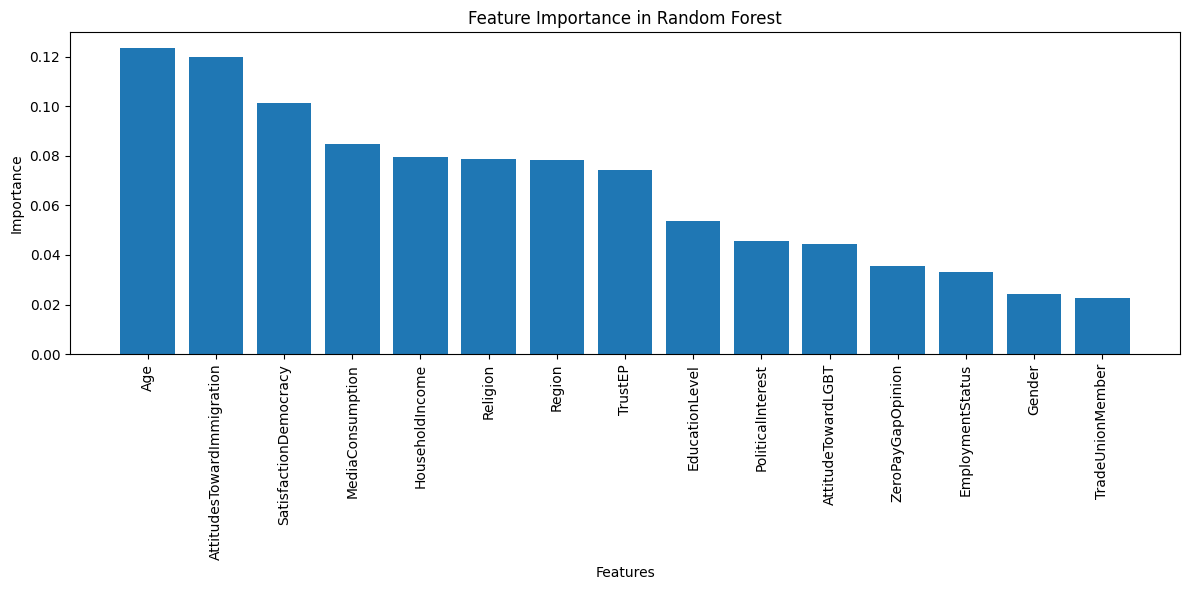

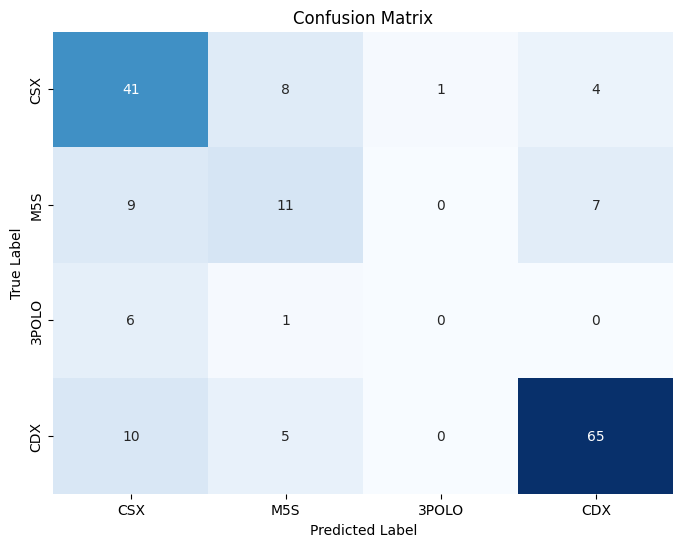

              precision    recall  f1-score   support

           1       0.62      0.76      0.68        54
           2       0.44      0.41      0.42        27
           3       0.00      0.00      0.00         7
           4       0.86      0.81      0.83        80

    accuracy                           0.70       168
   macro avg       0.48      0.49      0.48       168
weighted avg       0.68      0.70      0.68       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Bootstrapping for training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (with GridSearchCV and Bootstrapping on training set only): {accuracy}")

# Feature Importance
feature_importances = best_rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = [target_names[c] for c in best_rf_clf.classes_]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


3) Random forest + Weighting

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy (with GridSearchCV and class weights): 0.6964285714285714

Feature Importance:
                       Feature  Importance
11  AttitudesTowardImmigration    0.137631
0                          Age    0.120471
8        SatisfactionDemocracy    0.103417
4                       Region    0.086492
10                    Religion    0.079588
12            MediaConsumption    0.077808
3              HouseholdIncome    0.075409
9                      TrustEP    0.072720
2               EducationLevel    0.051836
13          AttitudeTowardLGBT    0.047308
7            PoliticalInterest    0.043818
14           ZeroPayGapOpinion    0.030913
5             EmploymentStatus    0.029479
6             TradeUnionMember    0.022321
1                       Gender    0.020790


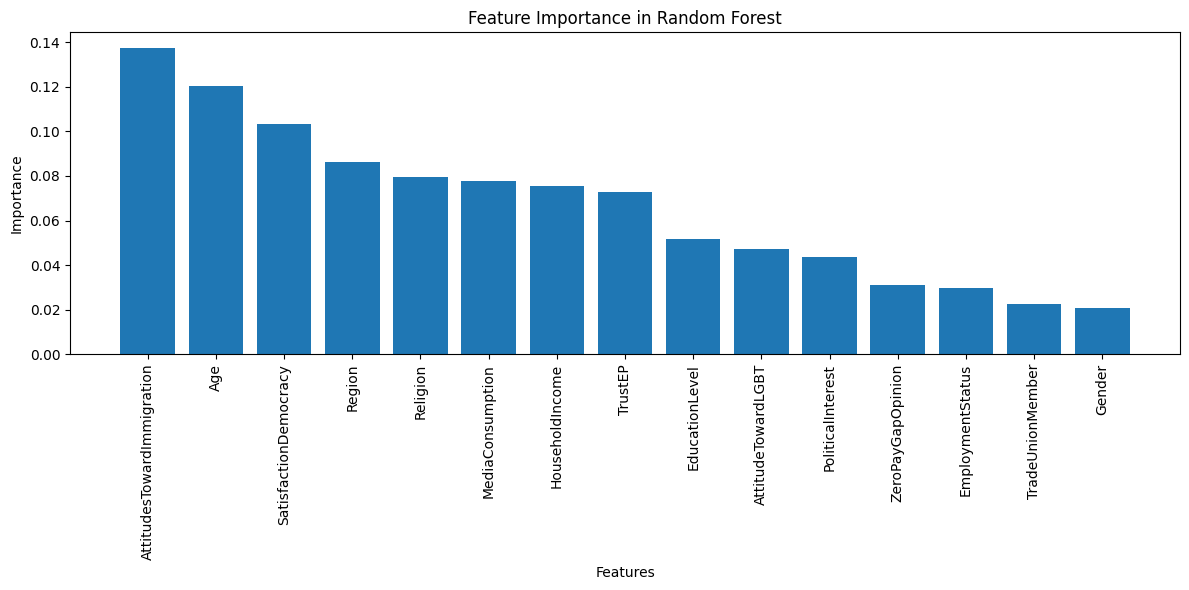

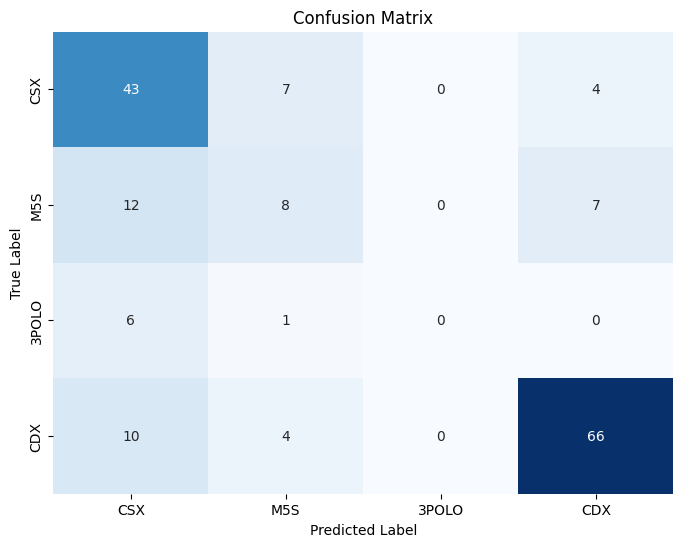

              precision    recall  f1-score   support

           1       0.61      0.80      0.69        54
           2       0.40      0.30      0.34        27
           3       0.00      0.00      0.00         7
           4       0.86      0.82      0.84        80

    accuracy                           0.70       168
   macro avg       0.47      0.48      0.47       168
weighted avg       0.67      0.70      0.68       168



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# GridSearchCV with weighted RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_clf = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

# Predictions and evaluation
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy (with GridSearchCV and class weights): {accuracy}")

# Feature Importance
feature_importances = best_rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_names = [target_names[c] for c in best_rf_clf.classes_]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


#XG Boost

Boosting takes advantage of trees which are trained sequentially, with each one learning from the errors of its predecessors. The final result has improved predictive accuracy. We employ XG Boost.

We initially perform a XG Boost without without SMOTE/bootstrapping

XGBoost Accuracy (with GridSearchCV): 0.7023809523809523


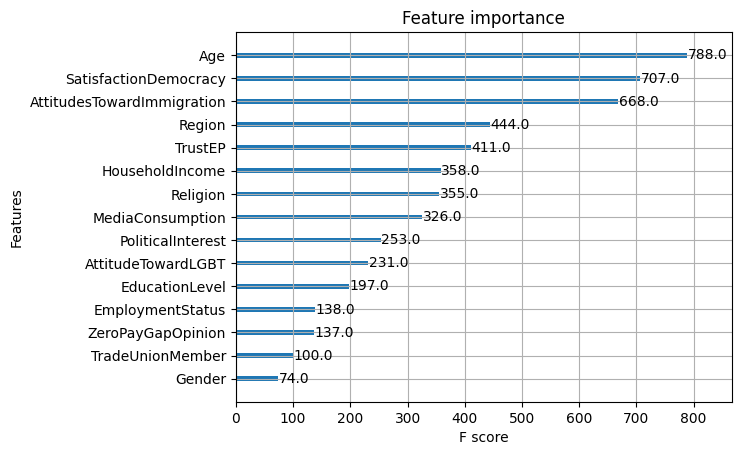

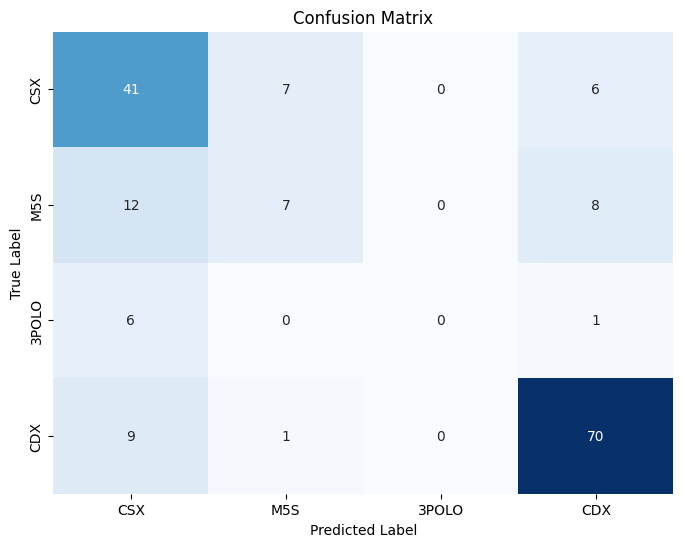

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Adjust target variable for XGBoost (Shift labels to [0, 1, 2, 3])
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Initialize XGBoost classifier with GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=60)
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy') # Use accuracy scoring
grid_search.fit(X_train, y_train_xgb)

best_xgb_clf = grid_search.best_estimator_
y_pred_xgb = best_xgb_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Accuracy (with GridSearchCV): {accuracy}")

# Plot feature importance
xgb.plot_importance(best_xgb_clf) # Use best_xgb_clf
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1) XG Boost + SMOTE

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}
XGBoost Accuracy (with SMOTE + GridSearchCV): 0.6488095238095238
              precision    recall  f1-score   support

           0       0.64      0.69      0.66        54
           1       0.36      0.48      0.41        27
           2       0.33      0.43      0.38         7
           3       0.86      0.70      0.77        80

    accuracy                           0.65       168
   macro avg       0.55      0.57      0.56       168
weighted avg       0.69      0.65      0.66       168



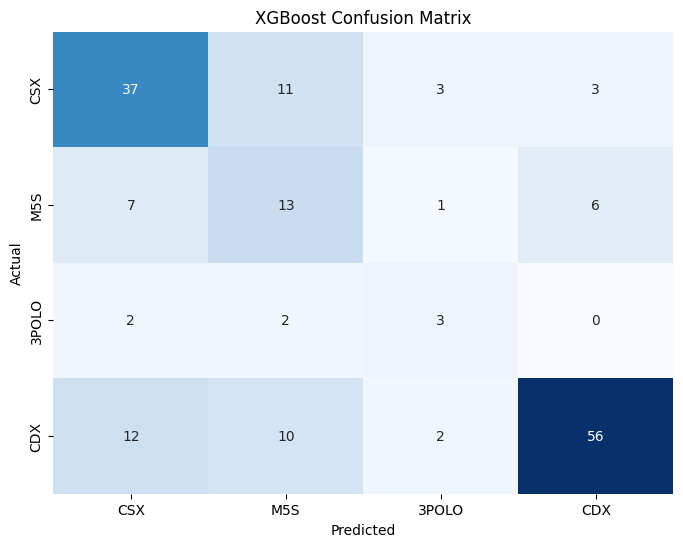

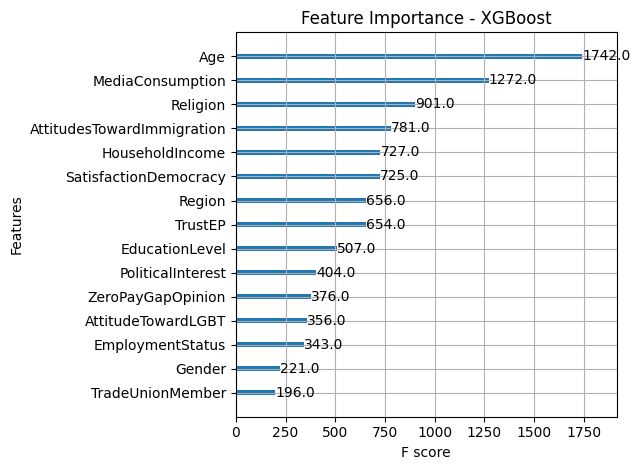

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_xgb)

xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=60
)

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_xgb = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

y_pred_xgb = best_xgb.predict(X_test)


# Evaluate
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Accuracy (with SMOTE + GridSearchCV): {accuracy}")
print(classification_report(y_test_xgb, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# Feature Importance
xgb.plot_importance(best_xgb)
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()


2) XG Boost + Bootstrapping

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:25:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy (with bootstrapping + GridSearchCV): 0.6548
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


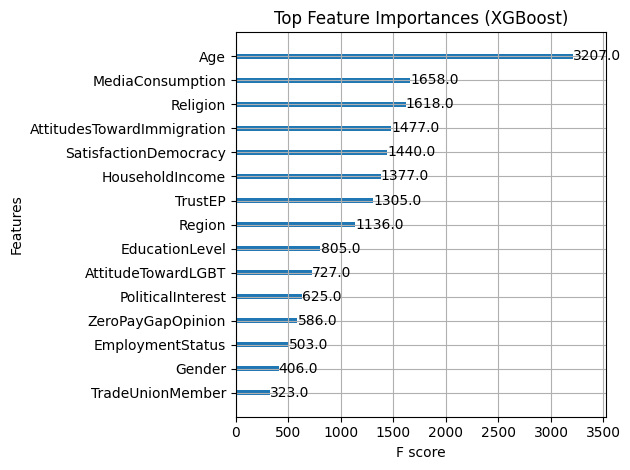

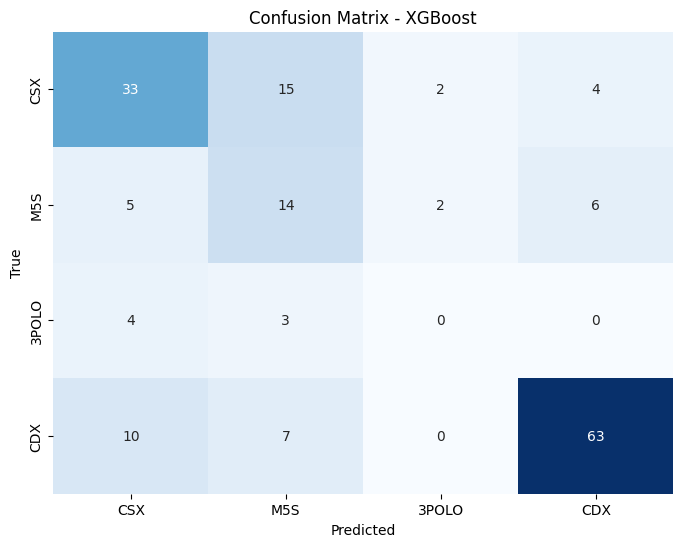

              precision    recall  f1-score   support

           0       0.63      0.61      0.62        54
           1       0.36      0.52      0.42        27
           2       0.00      0.00      0.00         7
           3       0.86      0.79      0.82        80

    accuracy                           0.65       168
   macro avg       0.46      0.48      0.47       168
weighted avg       0.67      0.65      0.66       168



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Apply Bootstrapping
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_xgb)

xgb_base = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=60
)

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_base, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Print accuracy and best params
accuracy = accuracy_score(y_test_xgb, y_pred_xgb)
print(f"XGBoost Accuracy (with bootstrapping + GridSearchCV): {accuracy:.4f}")
print("Best hyperparameters:", grid_search.best_params_)

# Feature importance
xgb.plot_importance(best_xgb, max_num_features=15)
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - XGBoost")
plt.show()

print(classification_report(y_test_xgb, y_pred_xgb))

#MLR

We finally move to Multinomial Logistic Regression, which is an extension of binary logistic regression to handle our 4-classes outcome. Multinomial regression models the relationship between predictor variables and the probability of belonging to each category of the outcome variable. At the ending of this notebook you can find an appendix with a comprehensive explanation for the interpretation of MLR Regressions.


Firstly, we use MLR model for prediction (Classification in voted coalition).

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Multinomial Logistic Regression Accuracy: 0.5298


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


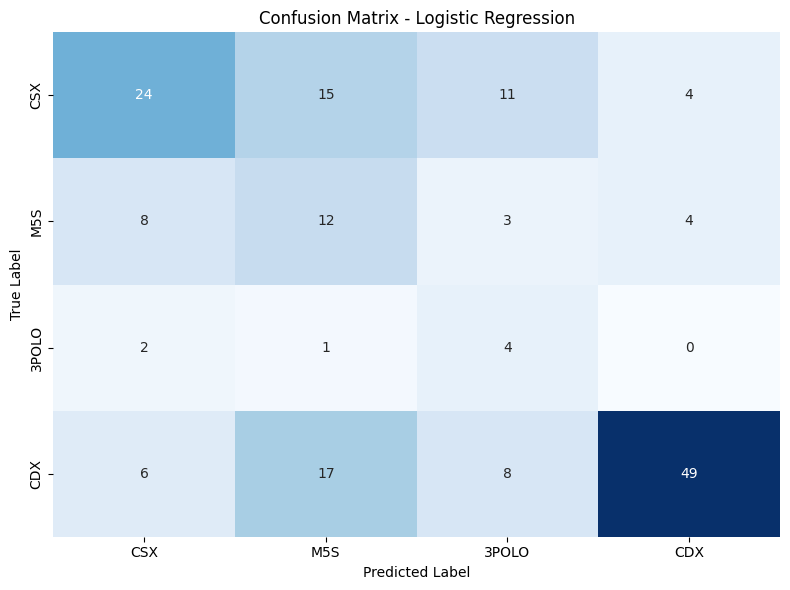


Classification Report:
              precision    recall  f1-score   support

         CSX       0.60      0.44      0.51        54
         M5S       0.27      0.44      0.33        27
       3POLO       0.15      0.57      0.24         7
         CDX       0.86      0.61      0.72        80

    accuracy                           0.53       168
   macro avg       0.47      0.52      0.45       168
weighted avg       0.65      0.53      0.57       168

Best Hyperparameters: {'clf__C': 1, 'clf__penalty': 'l1'}


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline with SMOTE, scaling, and logistic regression
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000, random_state=42))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'clf__penalty': ['l2', 'l1'],  # Only works with 'saga' solver
}

# GridSearch with StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Logistic Regression Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("Best Hyperparameters:", grid_search.best_params_)


We try RandomSearch to verify performance


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Multinomial Logistic Regression Accuracy (RandomOverSampler): 0.5238


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


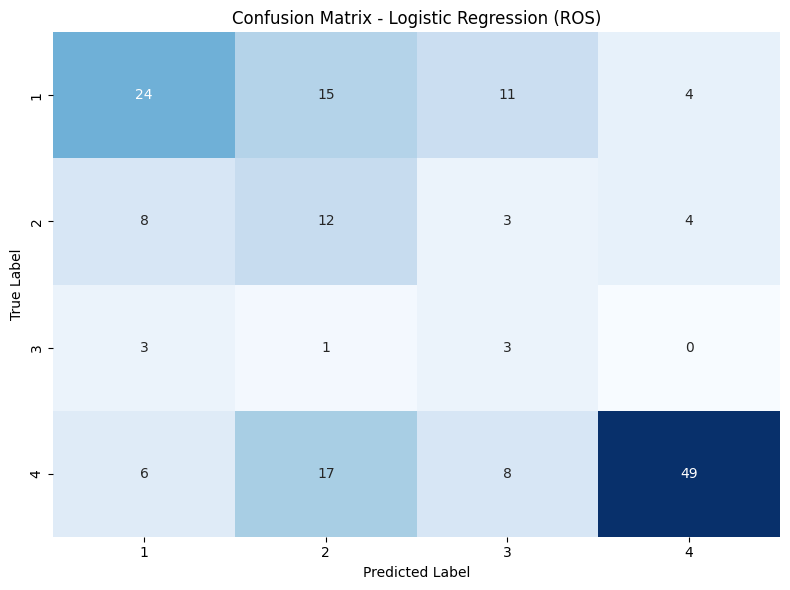


Classification Report:
Best Hyperparameters: {'clf__penalty': 'l1', 'clf__C': 0.5}


In [ ]:
# from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define pipeline with SMOTE, scaling, and logistic regression
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000, random_state=42))
])

# Hyperparameter space for random search
param_dist = {
    'clf__C': [0.01, 0.1, 0.5, 1, 5, 10],
    'clf__penalty': ['l1', 'l2']
}

# Cross-validation and Randomized Search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Logistic Regression Accuracy (RandomOverSampler): {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = sorted(y.unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (ROS)")
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
#print(classification_report(y_test, y_pred, target_names=class_names))

print("Best Hyperparameters:", random_search.best_params_)


We move to a simple MLR on the overall dataset for statistical inference, retrieving interpretation on the coefficients.

In [ ]:
# Standardize features (SCALE: 1SD increase)
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Manually add intercept
X_scaled = sm.add_constant(X_scaled)

# Fit multinomial logistic regression
y = y.reset_index(drop=True)

model = sm.MNLogit(y, X_scaled)
result = model.fit(method='newton', maxiter=100, full_output=True, disp=True)

print(result.summary())

odds_ratios = np.exp(result.params)
print("\nOdds Ratios:\n", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.823395
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:         VotedCoalition   No. Observations:                  837
Model:                        MNLogit   Df Residuals:                      789
Method:                           MLE   Df Model:                           45
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.2819
Time:                        20:30:54   Log-Likelihood:                -689.18
converged:                       True   LL-Null:                       -959.70
Covariance Type:            nonrobust   LLR p-value:                 2.914e-86
          VotedCoalition=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.5714      0.146     -3.907      0.000      

Here try to change baseline category to M5S

In [ ]:
X = df_final2.drop('VotedCoalition', axis=1)
y = df_final2['VotedCoalition'].reset_index(drop=True)

# Standardize features
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

X_scaled = sm.add_constant(X_scaled)

# We set y=2 as baseline by reordering categories - You may want to change it
# Convert to categorical and reorder levels
y_cat = pd.Categorical(y, categories=[2, 1, 3, 4], ordered=False)
y_reordered = y_cat.codes

# Fit the model
model = sm.MNLogit(y_reordered, X_scaled)
result = model.fit(method='newton', maxiter=100, full_output=True, disp=True)

print(result.summary())

odds_ratios = np.exp(result.params)
print("\nOdds Ratios:\n", odds_ratios)


Optimization terminated successfully.
         Current function value: 0.823395
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  837
Model:                        MNLogit   Df Residuals:                      789
Method:                           MLE   Df Model:                           45
Date:                Fri, 09 May 2025   Pseudo R-squ.:                  0.2819
Time:                        20:30:57   Log-Likelihood:                -689.18
converged:                       True   LL-Null:                       -959.70
Covariance Type:            nonrobust   LLR p-value:                 2.914e-86
                       y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5714      0.146      3.907      0.000      

For a more direct interpretation of the coefficients:

In [ ]:
# Taking the 'result' as our fitted statsmodels MNLogit model from before, where 'odds_ratios' were calculated as np.exp(result.params)

# Example: Get the percentage effect of 'Age' on the odds of voting for M5S (column [0]) vs CSX (baseline)
age_coefficient_m5s = result.params[0]['Age'] # Access the coefficient for Age for M5S (Index 0 is the first column in the results, M5S)
percentage_effect_age_m5s = (np.exp(age_coefficient_m5s) - 1) * 100

print(f"Percentage effect of a 1SD increase in Age on the odds of voting for M5S vs CSX: {percentage_effect_age_m5s:.2f}%")

# You can similarly extract percentage effects for other variables and other outcome categories using the correct coefficients from 'result.params'.


Percentage effect of a 1SD increase in Age on the odds of voting for M5S vs CSX: 127.01%


In [ ]:
# Recall assigned names for interpretation
coalition_mapping = label_names['VotedCoalition']

# Print the mapping in a user-friendly format:
print("Voted Coalition Labels and their Corresponding Names:")
for label, coalition_name in coalition_mapping.items():
    print(f"Label {label}: {coalition_name}")


Voted Coalition Labels and their Corresponding Names:
Label 1: CSX
Label 2: M5S
Label 3: TerzoPolo
Label 4: CDX


## Appendix: **Multinomial Logistic Regression Equations**

Multinomial regression is an extension of binary logistic regression used when the outcome variable has multiple categories (e.g., different coalitions: Left, Right, Center, etc.).
Instead of predicting a single continuous value (like OLS), MLR predicts the probability of each category given our selected predictors.

Since our outcome variable is categorical with more than two classes, and we want to estimate the probability of voting for each coalition, this is better than a simple OLS.


In a **Multinomial Logistic Regression**, the probability of voting for a coalition \( j \) over the reference category (**CSX**) is given by:

$$
\ln\left(\frac{P(Y=j)}{P(Y=CSX)}\right) = \beta_0^j + \beta_1^j X_1 + \beta_2^j X_2 + \dots + \beta_k^j X_k
$$

Where:
- \( Y \) = Voted Coalition  
- \( P(Y=j) \) = Probability of voting for coalition \( j \)  
- \( \beta_0^j \) = Intercept for coalition \( j \)  
- \( \beta_k^j \) = Coefficients for predictor \( X_k \) for coalition \( j \)  

The **coalition CSX** is the **reference category**.

---

## **🔹 Regression Equations for Each Coalition**
The following equations describe the **log-odds** of voting for **M5S, TerzoPolo, or CDX** relative to **CSX**.

### **🔹 Log-Odds of Voting for M5S vs CSX**

$$
\ln\left(\frac{P(Y=M5S)}{P(Y=CSX)}\right) =
\beta_0^{M5S} + \beta_1^{M5S} \cdot \text{Age} + \beta_2^{M5S} \cdot \text{Gender} + \beta_3^{M5S} \cdot \text{HouseholdIncome} + \beta_4^{M5S} \cdot \text{AttitudesTowardImmigration} + \beta_5^{M5S} \cdot \text{LeftRightScale} + \dots
$$

---

### **🔹 Log-Odds of Voting for TerzoPolo vs CSX**

$$
\ln\left(\frac{P(Y=TerzoPolo)}{P(Y=CSX)}\right) =
\beta_0^{TerzoPolo} + \beta_1^{TerzoPolo} \cdot \text{Age} + \beta_2^{TerzoPolo} \cdot \text{Gender} + \beta_3^{TerzoPolo} \cdot \text{Region} + \beta_4^{TerzoPolo} \cdot \text{AttitudesTowardImmigration} + \beta_5^{TerzoPolo} \cdot \text{LeftRightScale} + \dots
$$

---

### **🔹 Log-Odds of Voting for CDX vs CSX**

$$
\ln\left(\frac{P(Y=CDX)}{P(Y=CSX)}\right) =
\beta_0^{CDX} + \beta_1^{CDX} \cdot \text{Age} + \beta_2^{CDX} \cdot \text{Gender} + \beta_3^{CDX} \cdot \text{AttitudesTowardImmigration} + \beta_4^{CDX} \cdot \text{LeftRightScale} + \beta_5^{CDX} \cdot \text{SatisfactionDemocracy} + \dots
$$
